In [47]:
import pandas as pd
import pandas_profiling
import numpy as np 

In [15]:
!echo 1qazzse432w | sudo -S pip2 install PY3

[sudo] password for ukma: Requirement already satisfied: PY3 in /usr/lib64/python2.7/site-packages


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
def submit(vals,ID):
    test["id"] = test.index
    submission = pd.DataFrame.from_dict({'_ID_': test['id']})
    submission["_VAL_"]=vals[:,1]
    name = "submission"+str(ID)+".csv"
    submission.to_csv(name,index=False)
    return  pd.read_csv(name)

In [95]:
train = pd.read_csv("modulbank/train.csv",delimiter="\t")
test = pd.read_csv("modulbank/test.csv",delimiter="\t")

In [96]:
test.drop(["Unnamed: 0"],axis=1,inplace=True)
train.drop(["Unnamed: 0"],axis=1,inplace=True)

In [97]:
train["0"].value_counts(normalize=True)

0    0.822197
1    0.177803
Name: 0, dtype: float64

In [98]:
all_dataframe = pd.concat([train,test])

In [7]:
report = pandas_profiling.ProfileReport(all_dataframe)

/home/ukma/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ukma/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ukma/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ukma/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ukma/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Fon

In [8]:
report.to_file("report_all.html")

In [9]:
rejected = report.get_rejected_variables()

In [99]:
rejected = ['117', '119','140','164','122', '146', '148', '153', '158', '165', '179', '180', '206', '323', '324', '325', '326', '327', '333', '334', '335', '341', '9']

In [92]:
constant = ["140","164","2"]

According to the report shows that some features are constant

In [100]:
all_dataframe.drop(rejected,axis=1,inplace=True)

In [101]:
train,test = all_dataframe[:len(train)],all_dataframe[len(train):]

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8,random_state=42,shuffle=True)

In [46]:
X_train_new,Y_train_new = train.drop(["0"],axis=1),train["0"]
myIterator=skf.split(X_train_new,Y_train_new)

In [397]:
log_reg  = LogisticRegression()
params = {"C":[0.01,0.1,1,5,10]}
grid_search = GridSearchCV(log_reg,param_grid=params,scoring="roc_auc",cv=myIterator,verbose=3,n_jobs=1)

In [398]:
grid_search.fit(X_train_new,Y_train_new)

Fitting 8 folds for each of 5 candidates, totalling 40 fits
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.7119386694142167, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ................. C=0.01, score=0.7212224715717962, total=   1.2s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] ................. C=0.01, score=0.7089897578486306, total=   1.2s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.7196111087587566, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.7300517988454643, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.7184194475662306, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.7248283645166818, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.7230079586448341, total=   1.0s
[CV] C=0.1 ...........................................................
[CV] .................... C=0.1, score=0.72474206433219, total=   1.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.8min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x1142a4e60>,
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=3)

In [366]:
log_reg = LogisticRegression(**grid_search.best_params_)

In [368]:
myIterator=skf.split(X_train_new,Y_train_new)
scores1 = cross_val_score(log_reg,X_train_new,Y_train_new,cv=myIterator,scoring="roc_auc",n_jobs=1,verbose=3)


[CV]  ................................................................
[CV] ......................... , score=0.72474206433219, total=   2.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ....................... , score=0.7321016405320085, total=   1.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV] ....................... , score=0.7180881944738489, total=   2.0s
[CV]  ................................................................
[CV] ....................... , score=0.7286582640564941, total=   2.0s
[CV]  ................................................................
[CV] ....................... , score=0.7380662705301737, total=   1.5s
[CV]  ................................................................
[CV] ....................... , score=0.7292409071314144, total=   2.0s
[CV]  ................................................................
[CV] ....................... , score=0.7324387769124626, total=   2.2s
[CV]  ................................................................
[CV] ....................... , score=0.7221350810993733, total=   1.7s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.4s finished


In [369]:
print("Log regression val {:.4f}".format(scores1.mean()))

Log regression val 0.7282


In [397]:

cls = RandomForestClassifier(max_features=0.7,max_depth=12,criterion="entropy",**grid_search.best_params_)

In [389]:
param_grid = {"min_samples_split": [3,5,8,10],
              "min_samples_leaf": [30,40,50],}

# run grid search
grid_search = GridSearchCV(cls, param_grid,cv=3,verbose=3,scoring="roc_auc",n_jobs=8)

In [390]:
grid_search.fit(X_train_new,Y_train_new)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] min_samples_leaf=30, min_samples_split=3 ........................
[CV] min_samples_leaf=30, min_samples_split=3 ........................
[CV] min_samples_leaf=30, min_samples_split=3 ........................
[CV] min_samples_leaf=30, min_samples_split=5 ........................
[CV] min_samples_leaf=30, min_samples_split=5 ........................
[CV] min_samples_leaf=30, min_samples_split=5 ........................
[CV] min_samples_leaf=30, min_samples_split=8 ........................
[CV] min_samples_leaf=30, min_samples_split=8 ........................
[CV]  min_samples_leaf=30, min_samples_split=3, score=0.713227661457578, total=   7.3s
[CV] min_samples_leaf=30, min_samples_split=8 ........................
[CV]  min_samples_leaf=30, min_samples_split=3, score=0.715465360053866, total=   7.4s
[CV] min_samples_leaf=30, min_samples_split=10 .......................
[CV]  min_samples_leaf=30, min_samples_split=3, score=0

[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:   16.1s


[CV]  min_samples_leaf=40, min_samples_split=5, score=0.715947790098532, total=   7.2s
[CV] min_samples_leaf=50, min_samples_split=3 ........................
[CV]  min_samples_leaf=40, min_samples_split=8, score=0.7134514412423894, total=   7.2s
[CV]  min_samples_leaf=40, min_samples_split=5, score=0.7202427480747234, total=   7.4s
[CV] min_samples_leaf=50, min_samples_split=3 ........................
[CV]  min_samples_leaf=40, min_samples_split=8, score=0.715947790098532, total=   7.2s
[CV] min_samples_leaf=50, min_samples_split=3 ........................
[CV] min_samples_leaf=50, min_samples_split=5 ........................
[CV]  min_samples_leaf=40, min_samples_split=10, score=0.715947790098532, total=   7.1s
[CV]  min_samples_leaf=40, min_samples_split=10, score=0.7134514412423894, total=   7.3s
[CV]  min_samples_leaf=40, min_samples_split=8, score=0.7202427480747234, total=   7.4s
[CV] min_samples_leaf=50, min_samples_split=5 ........................
[CV] min_samples_leaf=50, min_

[Parallel(n_jobs=8)]: Done  34 out of  36 | elapsed:   35.0s remaining:    2.1s


[CV]  min_samples_leaf=50, min_samples_split=10, score=0.7156242291441475, total=   6.2s
[CV]  min_samples_leaf=50, min_samples_split=10, score=0.7102305540528093, total=   6.2s


[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   36.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'min_samples_split': [3, 5, 8, 10], 'min_samples_leaf': [30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

In [391]:
grid_search.best_score_

0.7165472053105175

In [393]:
best_rf = RandomForestClassifier(**grid_search.best_params_)

In [392]:
grid_search.best_params_

{'min_samples_leaf': 40, 'min_samples_split': 8}

In [399]:
myIterator=skf.split(X_train_new,Y_train_new)
scores2 = cross_val_score(cls,X_train_new,Y_train_new ,cv=myIterator,scoring="roc_auc",verbose=3,n_jobs=8)

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.7195908785103009, total=   9.6s
[CV] ....................... , score=0.7215659153246484, total=   9.7s
[CV] ....................... , score=0.7171954759518802, total=   9.8s


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    9.9s remaining:   29.7s


[CV] ....................... , score=0.7043972562137443, total=   9.7s
[CV] ....................... , score=0.7318532318998086, total=   9.9s
[CV] ........................ , score=0.712453304350531, total=   9.6s
[CV] ....................... , score=0.7223663106889326, total=   9.7s
[CV] ....................... , score=0.7176902203071085, total=   9.9s


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   10.4s remaining:    6.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   10.5s finished


In [400]:
print("RF  val {:.4f}".format(scores2.mean()))

RF  val 0.7184


In [411]:
best_rf.fit(X_train_new,Y_train_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=29, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
X_test = test.drop(["0"],axis=1)

In [417]:
from sklearn.ensemble import BaggingClassifier

In [428]:
clas = BaggingClassifier(log_reg,n_estimators=50,oob_score=True,bootstrap_features=True,n_jobs=8,verbose=3)
clas.fit(X_train_new,Y_train_new)

Building estimator 1 of 7 for this parallel run (total 50)...
Building estimator 1 of 7 for this parallel run (total 50)...
Building estimator 1 of 6 for this parallel run (total 50)...
Building estimator 1 of 6 for this parallel run (total 50)...
Building estimator 1 of 6 for this parallel run (total 50)...
Building estimator 1 of 6 for this parallel run (total 50)...
Building estimator 1 of 6 for this parallel run (total 50)...
Building estimator 1 of 6 for this parallel run (total 50)...
Building estimator 2 of 6 for this parallel run (total 50)...
Building estimator 2 of 7 for this parallel run (total 50)...
Building estimator 2 of 6 for this parallel run (total 50)...
Building estimator 2 of 7 for this parallel run (total 50)...
Building estimator 2 of 6 for this parallel run (total 50)...
Building estimator 2 of 6 for this parallel run (total 50)...
Building estimator 2 of 6 for this parallel run (total 50)...
Building estimator 2 of 6 for this parallel run (total 50)...
Building

[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.3min remaining:  4.0min


Building estimator 7 of 7 for this parallel run (total 50)...


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  1.4min remaining:   49.1s


Building estimator 7 of 7 for this parallel run (total 50)...


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.4min finished


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=True, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=8, oob_score=True,
         random_state=None, verbose=3, warm_start=False)

In [424]:
vals= np.c_[clas.oob_decision_function_,Y_train_new]

In [425]:
vals = vals[~np.isnan(vals[:,1])]

In [426]:
preds,true = vals[:,1],vals[:,2]

In [429]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train_new,clas.oob_decision_function_[:,1])

0.7250284208539598

Ensembles of models

In [430]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier

In [434]:
extree = ExtraTreesClassifier()
rand_search = RandomizedSearchCV(extree,param_distributions=param_grid,scoring="roc_auc",cv=myIterator,n_jobs=8,verbose=3)

In [435]:
myIterator=skf.split(X_train_new,Y_train_new)
rand_search.fit(X_train_new,Y_train_new)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[CV] max_depth=37, min_samples_leaf=10, criterion=entropy, min_samples_split=20, max_features=0.3 
[CV] max_depth=37, min_samples_leaf=10, criterion=entropy, min_samples_split=20, max_features=0.3 
[CV] max_depth=37, min_samples_leaf=10, criterion=entropy, min_samples_split=20, max_features=0.3 
[CV] max_depth=37, min_samples_leaf=10, criterion=entropy, min_samples_split=20, max_features=0.3 
[CV] max_depth=37, min_samples_leaf=10, criterion=entropy, min_samples_split=20, max_features=0.3 
[CV] max_depth=37, min_samples_leaf=10, criterion=entropy, min_samples_split=20, max_features=0.3 
[CV] max_depth=37, min_samples_leaf=10, criterion=entropy, min_samples_split=20, max_features=0.3 
[CV] max_depth=37, min_samples_leaf=10, criterion=entropy, min_samples_split=20, max_features=0.3 
[CV]  max_depth=37, min_samples_leaf=10, criterion=entropy, min_samples_split=20, max_features=0.3, score=0.7173293249213136, total=  19.7s
[CV] ma

[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.6min


[CV]  max_depth=5, min_samples_leaf=30, criterion=entropy, min_samples_split=10, max_features=0.3, score=0.6891269471614139, total=   7.2s
[CV] max_depth=5, min_samples_leaf=10, criterion=entropy, min_samples_split=10, max_features=0.9 
[CV]  max_depth=5, min_samples_leaf=30, criterion=entropy, min_samples_split=10, max_features=0.3, score=0.7073772188583553, total=   7.1s
[CV] max_depth=5, min_samples_leaf=10, criterion=entropy, min_samples_split=10, max_features=0.9 
[CV]  max_depth=5, min_samples_leaf=30, criterion=entropy, min_samples_split=10, max_features=0.3, score=0.6937020413732105, total=   6.9s
[CV] max_depth=5, min_samples_leaf=10, criterion=entropy, min_samples_split=10, max_features=0.9 
[CV]  max_depth=5, min_samples_leaf=30, criterion=entropy, min_samples_split=10, max_features=0.3, score=0.702977139819245, total=   6.8s
[CV] max_depth=5, min_samples_leaf=10, criterion=entropy, min_samples_split=10, max_features=0.9 
[CV]  max_depth=5, min_samples_leaf=30, criterion=ent

[CV]  max_depth=5, min_samples_leaf=30, criterion=entropy, min_samples_split=20, max_features=0.9, score=0.7015050363909235, total=  17.3s
[CV] max_depth=29, min_samples_leaf=20, criterion=entropy, min_samples_split=10, max_features=0.9 
[CV]  max_depth=5, min_samples_leaf=30, criterion=entropy, min_samples_split=20, max_features=0.9, score=0.7011112522523795, total=  17.2s
[CV] max_depth=29, min_samples_leaf=20, criterion=entropy, min_samples_split=10, max_features=0.9 
[CV]  max_depth=5, min_samples_leaf=30, criterion=entropy, min_samples_split=20, max_features=0.9, score=0.6849801774429466, total=  16.6s
[CV] max_depth=29, min_samples_leaf=20, criterion=entropy, min_samples_split=10, max_features=0.9 
[CV]  max_depth=5, min_samples_leaf=30, criterion=entropy, min_samples_split=20, max_features=0.9, score=0.6999471021981767, total=  16.3s
[CV] max_depth=29, min_samples_leaf=20, criterion=entropy, min_samples_split=10, max_features=0.9 
[CV]  max_depth=5, min_samples_leaf=30, criterio

[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:  5.1min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x129980150>,
          error_score='raise',
          estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=8,
          param_distributions={'max_depth': [5, 13, 21, 29, 37], 'min_samples_split': [10, 20, 30], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [10, 20, 30], 'max_features': [0.3, 0.7, 0.9]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [436]:
rand_search.best_score_

0.7249621736009902

In [437]:
extr_tree = ExtraTreesClassifier(**rand_search.best_params_)

In [438]:
preds = []
for clf in (best_rf,log_reg,extr_tree):
    print("Classifier is being trained {}".format(clf))
    clf.fit(X_train_new,Y_train_new)
    preds.append(clf.predict_proba(X_test)[:,1])
    

Classifier is being trained RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=29, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Classifier is being trained LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Classifier is being trained ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=37, max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=

In [439]:
np.corrcoef(preds[0],preds[1])

array([[1.        , 0.80300428],
       [0.80300428, 1.        ]])

In [440]:
np.corrcoef(preds[1],preds[2])

array([[1.        , 0.78441624],
       [0.78441624, 1.        ]])

In [441]:
np.corrcoef(preds[0],preds[2])

array([[1.       , 0.8438106],
       [0.8438106, 1.       ]])

Seems like our predictions are not completely correlated which makes it a good choice for the ensemble

In [442]:
voting_clf = VotingClassifier(estimators=[("lr",log_reg),("rf",best_rf),("extrees",extr_tree)],voting="soft")
scores3 = cross_val_score(voting_clf,X_train_new,Y_train_new,cv=myIterator,n_jobs=1,scoring="roc_auc",verbose=3)

[CV]  ................................................................
[CV] ....................... , score=0.7369305537912897, total=   9.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


[CV] ....................... , score=0.7377463503220373, total=  11.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.9s remaining:    0.0s


[CV] ........................ , score=0.729756813594727, total=  11.4s
[CV]  ................................................................
[CV] ........................ , score=0.735573245261182, total=  10.6s
[CV]  ................................................................
[CV] ....................... , score=0.7536910794013729, total=   9.6s
[CV]  ................................................................
[CV] ....................... , score=0.7334586126469044, total=  10.3s
[CV]  ................................................................
[CV] ....................... , score=0.7384208406044279, total=   9.7s
[CV]  ................................................................
[CV] ......................... , score=0.73752261139322, total=   9.6s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.4min finished


In [444]:
print("Ensembles val {:.4f} ".format(scores3.mean()))

Ensembles val 0.7379 


In [445]:
voting_clf.fit(X_train_new,Y_train_new)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

## Stacking

In [447]:
rf_predictions = []
et_predictions = []
log_predictions=[]
for train, val in skf.split(X_train_new,Y_train_new):
    best_rf.fit(X_train_new.iloc[train], Y_train_new[train])
    extr_tree.fit(X_train_new.iloc[train], Y_train_new[train])
    log_reg.fit(X_train_new.iloc[train],Y_train_new[train])
    rf_predictions.append([Y_train_new[val], best_rf.predict_proba(X_train_new.iloc[val])[:,1]])
    et_predictions.append([Y_train_new[val], extr_tree.predict_proba(X_train_new.iloc[val])[:,1]])
    log_predictions.append([Y_train_new[val], log_reg.predict_proba(X_train_new.iloc[val])[:,1]])
    

In [448]:
X_train_aug = X_train_new.copy()

In [450]:
X_train_aug["rf_preds"] = 0
X_train_aug["et_preds"] = 0
X_train_aug["log_preds"]=0

In [451]:
for i, fold in enumerate(skf.split(X_train_new,Y_train_new)):
    train, val = fold[0], fold[1]
    X_train_aug.iloc[val, -1] = rf_predictions[i][1]
    X_train_aug.iloc[val, -2] = et_predictions[i][1]
    X_train_aug.iloc[val, -3] = log_predictions[i][1]

In [456]:
import xgboost 

In [457]:
xgbClas = xgboost.XGBClassifier()

In [458]:
myIterator=skf.split(X_train_aug,Y_train_new)
scores_xgb = cross_val_score(xgbClas,X_train_aug,Y_train_new,cv=myIterator,n_jobs=8,scoring="roc_auc",verbose=3)

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.7472564489797839, total= 1.3min
[CV] ....................... , score=0.7397832540589877, total= 1.3min


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.4min remaining:  4.1min


[CV] ......................... , score=0.73902955968629, total= 1.3min
[CV] ....................... , score=0.7300376847186348, total= 1.3min
[CV] ........................ , score=0.749017892008111, total= 1.3min


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  1.4min remaining:   49.3s


[CV] ....................... , score=0.7387542755919001, total= 1.3min
[CV] ....................... , score=0.7386147364616453, total= 1.3min
[CV] ....................... , score=0.7333677237031501, total= 1.3min


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.4min finished


In [459]:
print("Using stacking {:.5f}".format(scores_xgb.mean()))

Using stacking 0.73948


In [468]:
xgbClas.fit(X_train_aug,Y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [466]:
def predict_test_proba():
    X_test["rf_preds"] = 0
    X_test["et_preds"] = 0
    X_test["log_preds"]=0
    for index,clas in enumerate([best_rf,extr_tree,log_reg]):
        clas.fit(X_train_new,Y_train_new)
        res = clas.predict_proba(X_test.iloc[:,:-3])[:,1]
        X_test.iloc[:,-(index+1)] = res

In [467]:
predict_test_proba()

In [470]:
vals = xgbClas.predict_proba(X_test)

In [ ]:
submit(vals,"xgb_submissions")

## Boosting tuning

In [187]:
!pip install bayesian-optimization

  Running setup.py bdist_wheel for bayesian-optimization ... done
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/c5/92/8b/a2c219cb16b9a6271dd0e72b5c9e930c32dee10908870e5512
Successfully built bayesian-optimization


Inspired by  __[this course material ](https://www.coursera.org/learn/bayesian-methods-in-machine-learning/lecture/iRLaF/bayesian-optimization)__ I decided to use bayesian optimization for my paramaters tuning

In [499]:
def xgb_evaluate(min_child_weight, colsample_bytree, max_depth,
                 subsample,
                 gamma,
                 alpha,
                 n_estimators,
                 learning_rate):
    
 
    '''According to the idea, this is our surrogate function which we will optimize '''

    params['min_child_weight'] = int(min_child_weight)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)
    params["n_estimators"] = int(n_estimators)
    params["learning_rate"] = max(learning_rate,0)


    cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,
             seed=random_state,
             callbacks=[xgb.callback.early_stop(50)])

    return cv_result['test-auc-mean'].values[-1]

In [500]:
from bayes_opt import BayesianOptimization

In [501]:
xgtrain = xgboost.DMatrix(X_train_aug,Y_train_new)

In [502]:
num_rounds = 3000
random_state = 2016
num_iter = 25
init_points = 10
params = {
    'eta': 0.1,
    'silent': 1,
    'eval_metric': 'auc',
    'verbose_eval': True,
    'seed': random_state
}

xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                            'colsample_bytree': (0.1, 1),
                                            'max_depth': (3, 15),
                                            'subsample': (0.5, 1),
                                            'gamma': (0, 10),
                                            'alpha': (0, 10),
                                            "n_estimators":(50,1000),
                                            "learning_rate":(0.01,0.1),
                                            })

In [503]:
xgbBO.maximize(init_points=init_points, n_iter=num_iter)

Initialization
--------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   learning_rate |   max_depth |   min_child_weight |   n_estimators |   subsample | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[268]	train-auc:0.751394+0.00255534	test-auc:0.740383+0.00800751

    1 | 15m18s |    0.74038 |    6.9163 |             0.1734 |    2.0084 |          0.0626 |      6.8430 |             4.4632 |       757.6568 |      0.6534 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[212]	train-auc:0.739033+0.0019837	test-auc:0.735105+0.00889134

    2 | 09m25s |    0.73511 |    8.1910 |

/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 64, 'warnflag': 2, 'nit': 6, 'grad': array([-2.80431932e-05])}
  " state: %s" % convergence_dict)


Bayesian Optimization
--------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   learning_rate |   max_depth |   min_child_weight |   n_estimators |   subsample | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[32]	train-auc:0.901771+0.00155279	test-auc:0.733541+0.00701052

   11 | 68m47s |    0.73354 |    1.1497 |             0.2581 |    0.6100 |          0.0521 |     12.2419 |             3.3777 |        50.5792 |      0.8343 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[68]	train-auc:0.944801+0.00345983	test-auc:0.735019+0.00657698

   12 | 12m44s |    0.73502 |    0.

/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'warnflag': 2, 'nit': 4, 'grad': array([-5.77059045e-05])}
  " state: %s" % convergence_dict)
/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[21]	train-auc:0.826319+0.003326	test-auc:0.737174+0.00645488

   13 | 05m45s |    0.73717 |    0.0330 |             0.7143 |    0.0530 |          0.0979 |      7.4087 |            19.6819 |       775.1989 |      0.8997 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[37]	train-auc:0.772549+0.00125129	test-auc:0.738277+0.00673704

   14 | 09m28s |    0.73828 |    9.5055 |             0.7337 |    0.9096 |          0.0998 |     14.9314 |             2.1799 |       865.1332 |      0.6109 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[121]	train-auc:0.747955+0.00192407	test-auc:0.7402

/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'warnflag': 2, 'nit': 5, 'grad': array([0.0002687])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[69]	train-auc:0.739343+0.00288806	test-auc:0.735726+0.00759502

   18 | 06m31s |    0.73573 |    0.5061 |             0.4319 |    9.8621 |          0.0840 |      7.0254 |            19.5997 |        53.3090 |      0.8441 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'warnflag': 2, 'nit': 6, 'grad': array([6.35104037e-05])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[88]	train-auc:0.749549+0.00208844	test-auc:0.740392+0.00805895

   19 | 05m36s |    0.74039 |    6.2402 |             0.1666 |    1.2251 |          0.0434 |      3.1262 |             1.9284 |       924.8154 |      0.8917 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'warnflag': 2, 'nit': 2, 'grad': array([-0.00044117])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[145]	train-auc:0.738003+0.00270229	test-auc:0.735077+0.00769037

   20 | 05m27s |    0.73508 |    9.8730 |             0.7281 |    7.2938 |          0.0775 |      3.1994 |             3.8235 |       996.7281 |      0.5002 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'warnflag': 2, 'nit': 5, 'grad': array([6.94166101e-05])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[36]	train-auc:0.753232+0.00182126	test-auc:0.740671+0.00779251

   21 | 01m46s |    0.74067 |    0.3795 |             0.6503 |    0.2059 |          0.0942 |      3.1356 |            13.9817 |       301.0260 |      0.9739 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[114]	train-auc:0.74037+0.00231658	test-auc:0.737399+0.00772071

   22 | 19m30s |    0.73740 |    0.2486 |             0.1309 |    7.0136 |          0.0744 |     14.8200 |            17.9987 |       305.7656 |      0.5534 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'warnflag': 2, 'nit': 4, 'grad': array([-8.3015409e-05])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[32]	train-auc:0.764212+0.00151011	test-auc:0.740507+0.00695284

   23 | 03m15s |    0.74051 |    0.3360 |             0.4798 |    0.5477 |          0.0855 |      4.1908 |             1.2782 |       700.8349 |      0.9376 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'warnflag': 2, 'nit': 5, 'grad': array([0.00030407])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[62]	train-auc:0.755525+0.00163258	test-auc:0.740213+0.00782751

   24 | 02m51s |    0.74021 |    7.8244 |             0.3326 |    0.1979 |          0.0713 |      3.0913 |            19.1130 |        91.4993 |      0.7613 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[29]	train-auc:0.790761+0.00136794	test-auc:0.7386+0.00891448

   25 | 05m19s |    0.73860 |    0.3989 |             0.1006 |    0.7812 |          0.0506 |      6.4887 |             1.4042 |       526.3990 |      0.5198 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'warnflag': 2, 'nit': 6, 'grad': array([-0.0001909])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[35]	train-auc:0.770213+0.0014051	test-auc:0.736916+0.00677568

   26 | 07m35s |    0.73692 |    9.6457 |             0.3826 |    0.5351 |          0.0618 |     14.4826 |            19.2776 |       949.1730 |      0.6705 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 59, 'warnflag': 2, 'nit': 4, 'grad': array([-0.00020506])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[36]	train-auc:0.76214+0.0014864	test-auc:0.740203+0.00682429

   27 | 02m53s |    0.74020 |    0.6806 |             0.5421 |    0.2158 |          0.0675 |      4.0408 |            19.6053 |        54.6258 |      0.9928 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[48]	train-auc:0.756523+0.00164656	test-auc:0.740211+0.00715366

   28 | 03m32s |    0.74021 |    0.6076 |             0.5664 |    0.1205 |          0.0868 |      3.0533 |            19.8399 |       143.9707 |      0.7230 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'warnflag': 2, 'nit': 4, 'grad': array([-5.62433883e-05])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[150]	train-auc:0.756223+0.00178005	test-auc:0.740753+0.0070435

   29 | 04m49s |    0.74075 |    0.5371 |             0.9712 |    0.3437 |          0.0280 |      3.8254 |            19.6945 |       361.9041 |      0.9247 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'warnflag': 2, 'nit': 6, 'grad': array([-0.00025933])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[225]	train-auc:0.747741+0.002193	test-auc:0.73949+0.00735738

   30 | 07m47s |    0.73949 |    2.5593 |             0.1458 |    2.1574 |          0.0582 |      3.2488 |             1.4223 |       819.0518 |      0.5267 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 62, 'warnflag': 2, 'nit': 5, 'grad': array([-0.00064619])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[24]	train-auc:0.872762+0.00237663	test-auc:0.727627+0.00622389

   31 | 09m39s |    0.72763 |    0.8491 |             0.2201 |    1.1279 |          0.0779 |     14.1954 |             1.2049 |       734.7474 |      0.5861 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[149]	train-auc:0.748439+0.00192036	test-auc:0.739891+0.00701191

   32 | 06m37s |    0.73989 |    8.9561 |             0.6328 |    1.4185 |          0.0780 |      3.9936 |            19.3899 |       678.7082 |      0.5601 | 


/Users/mac/anaconda3/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 63, 'warnflag': 2, 'nit': 6, 'grad': array([-0.00018538])}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[133]	train-auc:0.755848+0.00174829	test-auc:0.740024+0.00705732

   33 | 06m41s |    0.74002 |    9.7390 |             0.6761 |    0.2984 |          0.0359 |      3.4775 |            18.1556 |       868.9848 |      0.6296 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[84]	train-auc:0.780223+0.000926588	test-auc:0.73906+0.00699998

   34 | 14m16s |    0.73906 |    7.8818 |             0.9382 |    0.8428 |          0.0405 |     13.9725 |            19.9323 |        55.0471 |      0.6676 | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[188]	train-auc:0.75667+0.0017583	test-auc:0.739

In [507]:
best_params = xgbBO.res['max']['max_params']
best_params

{'alpha': 0.5370730489004005,
 'colsample_bytree': 0.9711819342305409,
 'gamma': 0.343690951680623,
 'learning_rate': 0.02800171027744057,
 'max_depth': 3.825439512548069,
 'min_child_weight': 19.6945067158265,
 'n_estimators': 361.9041398081913,
 'subsample': 0.9247161516471999}

In [505]:
xgbBO.res["max"]["max_val"]

0.7407528000000001

In [514]:
best_params["max_depth"]=int(best_params["max_depth"])
best_params["n_estimators"]=int(best_params["n_estimators"])

In [518]:
xgbClasTuned = xgboost.XGBClassifier(**best_params)

In [519]:
xgbClasTuned.fit(X_train_aug,Y_train_new)

XGBClassifier(alpha=0.5370730489004005, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.9711819342305409,
       gamma=0.343690951680623, learning_rate=0.02800171027744057,
       max_delta_step=0, max_depth=3, min_child_weight=19.6945067158265,
       missing=None, n_estimators=361, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9247161516471999)

In [521]:
vals = xgbClasTuned.predict_proba(X_test)

## More ensembles

In [102]:
from xgboost import XGBClassifier

In [103]:
xgb_clas = XGBClassifier(
    max_depth=4,
    n_estimators =200,
    learning_rate=0.065,
    objective="binary:logistic",
    n_jobs=-1,
    nthread=4,
    subsample=0.85,
    colsample_bytree=0.9,
    colsample_bylevel=0.9,
    tree_method="hist",
    grow_policy="lossguide"
)

In [104]:
X_train_new,Y_train_new = train.drop(["0"],axis=1),train["0"]
myIterator=skf.split(X_train_new,Y_train_new)

In [105]:
scores = cross_val_score(xgb_clas,X_train_new,Y_train_new,cv=8,n_jobs=8,scoring="roc_auc",verbose=4)

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.7403539352537956, total=  26.3s
[CV] ....................... , score=0.7347532144923854, total=  28.0s


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   28.2s remaining:  1.4min


[CV] ....................... , score=0.7428456562087893, total=  27.8s
[CV] ....................... , score=0.7338508513170834, total=  29.0s
[CV] ....................... , score=0.7565952962319986, total=  29.1s
[CV] ....................... , score=0.7449290585885512, total=  28.7s


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   29.6s remaining:   17.8s


[CV] ....................... , score=0.7333684887229792, total=  29.0s
[CV] ....................... , score=0.7338510865525304, total=  29.4s


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   30.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   30.0s finished


In [106]:
scores.mean()

0.740068448421014

Now we add an index feature

In [51]:
#X_train_new["id"] = X_train_new.index
#X_test["id"] = X_test.index

In [61]:
#X_train_new.drop(["id"],axis=1,inplace=True)
#X_test.drop(["id"],axis=1,inplace=True)

In [42]:
scores

array([0.73538129, 0.73317337, 0.73660711, 0.75751554, 0.73599385,
       0.73648471, 0.74468057, 0.74053197])

0.7443876519569693

In [ ]:
scores = cross_val_score(xgb_clas,X_train_new,Y_train_new,cv=8,n_jobs=8,scoring="roc_auc",verbose=4)

In [65]:
val_ids= scores_id
lb_result_ids = 0.75627114

In [66]:
val_without_ids=scores
lb_result_without_ids =0.75814019

In [69]:
val_ids.mean()

0.7374555893693024

In [70]:
val_without_ids.mean()

0.7400460495681387

In [71]:
lb_result_without_ids-lb_result_ids

0.0018690500000000387

In [73]:
np.abs(val_ids.mean()-val_without_ids.mean())

0.002590460198836242

In [108]:
from lightgbm import LGBMClassifier

In [109]:
np.random.seed(145)

In [128]:
lgbmClas  = LGBMClassifier(num_leaves=21,
                           learning_rate=0.02,
                           n_estimators=800,
                           objective="binary",
                           subsample=0.7,
                           colsample_bytree=0.7,
                           )

In [129]:
scores = cross_val_score(lgbmClas,X_train_new,Y_train_new,cv=8,n_jobs=8,scoring="roc_auc",verbose=4,)

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ........................ , score=0.746858901074085, total= 1.2min
[CV] ....................... , score=0.7420088166245595, total= 1.3min


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.3min remaining:  3.9min


[CV] ....................... , score=0.7657365457085997, total= 1.3min
[CV] ....................... , score=0.7361650976462341, total= 1.4min
[CV] ....................... , score=0.7494676483868261, total= 1.4min
[CV] ....................... , score=0.7354448067070332, total= 1.4min


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  1.4min remaining:   50.4s


[CV] ....................... , score=0.7427439652267547, total= 1.4min
[CV] ....................... , score=0.7496635059759457, total= 1.4min


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.4min finished


In [130]:
scores.mean()

0.7460111609187547

In [44]:
X_test = test.drop(["0"],axis=1)

In [26]:
lgb_tuned_lb = 0.76109132

In [41]:
lgb_cv = 0.74243
lgb_lb = 0.76036423
lgb_tuned_cv = 0.7460111609187547

In [42]:
print("Diff with tuned lgbm {:.6f}".format(lgb_tuned_lb-lgb_tuned_cv))

Diff with tuned lgbm 0.015080


In [43]:
print("Diff with default lgbm {:.6f} ".format(lgb_lb-lgb_cv))

Diff with default lgbm 0.017934 


In [43]:
lgbmClas.fit(X_train_new,Y_train_new)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        learning_rate=0.02, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=800,
        n_jobs=-1, num_leaves=21, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.7,
        subsample_for_bin=200000, subsample_freq=1)

Looks like we have a quite good validation

In [45]:
vals = lgbmClas.predict_proba(X_test)

In [ ]:
submit(vals,"_lgbm_tuned")

In [11]:
from catboost import CatBoostClassifier,Pool

In [24]:
cat_cols = [column for column in all_dataframe.columns[1:] if len(all_dataframe[column].value_counts())==2]

In [25]:
len(cat_cols)

237

In [24]:
data = Pool(X_train_new,Y_train_new,cat_features=cat_cols_int)

In [21]:

cat_boost= CatBoostClassifier(iterations=900,learning_rate=0.05,depth=5,od_wait=10,rsm=0.6,od_type="Iter")

In [32]:
scores_cat = cross_val_score(cat_boost,X_train_new,Y_train_new,cv=8,n_jobs=1,scoring="roc_auc",verbose=4)

[CV]  ................................................................
0:	learn: 0.6668183	total: 27.2ms	remaining: 24.5s
1:	learn: 0.6422464	total: 54.4ms	remaining: 24.4s
2:	learn: 0.6220549	total: 82.4ms	remaining: 24.6s
3:	learn: 0.6029908	total: 110ms	remaining: 24.6s
4:	learn: 0.5865338	total: 138ms	remaining: 24.7s
5:	learn: 0.5724443	total: 166ms	remaining: 24.8s
6:	learn: 0.5593957	total: 193ms	remaining: 24.6s
7:	learn: 0.5479362	total: 219ms	remaining: 24.5s
8:	learn: 0.5364134	total: 248ms	remaining: 24.5s
9:	learn: 0.5271300	total: 275ms	remaining: 24.5s
10:	learn: 0.5182768	total: 304ms	remaining: 24.6s
11:	learn: 0.5111173	total: 333ms	remaining: 24.6s
12:	learn: 0.5040346	total: 359ms	remaining: 24.5s
13:	learn: 0.4985041	total: 387ms	remaining: 24.5s
14:	learn: 0.4928473	total: 415ms	remaining: 24.5s
15:	learn: 0.4875291	total: 442ms	remaining: 24.4s
16:	learn: 0.4831314	total: 475ms	remaining: 24.7s
17:	learn: 0.4786963	total: 506ms	remaining: 24.8s
18:	learn: 0.47432

161:	learn: 0.4108787	total: 4.7s	remaining: 21.4s
162:	learn: 0.4107857	total: 4.73s	remaining: 21.4s
163:	learn: 0.4106985	total: 4.76s	remaining: 21.4s
164:	learn: 0.4106449	total: 4.79s	remaining: 21.3s
165:	learn: 0.4105535	total: 4.82s	remaining: 21.3s
166:	learn: 0.4104775	total: 4.85s	remaining: 21.3s
167:	learn: 0.4103486	total: 4.87s	remaining: 21.2s
168:	learn: 0.4102716	total: 4.9s	remaining: 21.2s
169:	learn: 0.4101528	total: 4.93s	remaining: 21.2s
170:	learn: 0.4100530	total: 4.96s	remaining: 21.2s
171:	learn: 0.4099087	total: 4.99s	remaining: 21.1s
172:	learn: 0.4098279	total: 5.02s	remaining: 21.1s
173:	learn: 0.4097469	total: 5.05s	remaining: 21.1s
174:	learn: 0.4096598	total: 5.08s	remaining: 21.1s
175:	learn: 0.4095467	total: 5.11s	remaining: 21s
176:	learn: 0.4094276	total: 5.14s	remaining: 21s
177:	learn: 0.4093072	total: 5.16s	remaining: 20.9s
178:	learn: 0.4091962	total: 5.19s	remaining: 20.9s
179:	learn: 0.4090100	total: 5.22s	remaining: 20.9s
180:	learn: 0.4089

320:	learn: 0.3952351	total: 9.34s	remaining: 16.9s
321:	learn: 0.3951244	total: 9.37s	remaining: 16.8s
322:	learn: 0.3950521	total: 9.39s	remaining: 16.8s
323:	learn: 0.3949678	total: 9.43s	remaining: 16.8s
324:	learn: 0.3948451	total: 9.45s	remaining: 16.7s
325:	learn: 0.3947858	total: 9.48s	remaining: 16.7s
326:	learn: 0.3946619	total: 9.51s	remaining: 16.7s
327:	learn: 0.3945526	total: 9.54s	remaining: 16.6s
328:	learn: 0.3944730	total: 9.57s	remaining: 16.6s
329:	learn: 0.3943773	total: 9.6s	remaining: 16.6s
330:	learn: 0.3943074	total: 9.62s	remaining: 16.5s
331:	learn: 0.3942272	total: 9.65s	remaining: 16.5s
332:	learn: 0.3941622	total: 9.69s	remaining: 16.5s
333:	learn: 0.3941022	total: 9.71s	remaining: 16.5s
334:	learn: 0.3940408	total: 9.74s	remaining: 16.4s
335:	learn: 0.3939873	total: 9.77s	remaining: 16.4s
336:	learn: 0.3938921	total: 9.79s	remaining: 16.4s
337:	learn: 0.3938355	total: 9.82s	remaining: 16.3s
338:	learn: 0.3937511	total: 9.85s	remaining: 16.3s
339:	learn: 0

485:	learn: 0.3834348	total: 14.1s	remaining: 12s
486:	learn: 0.3833635	total: 14.1s	remaining: 12s
487:	learn: 0.3833210	total: 14.1s	remaining: 11.9s
488:	learn: 0.3832601	total: 14.1s	remaining: 11.9s
489:	learn: 0.3831841	total: 14.2s	remaining: 11.9s
490:	learn: 0.3831073	total: 14.2s	remaining: 11.8s
491:	learn: 0.3830884	total: 14.2s	remaining: 11.8s
492:	learn: 0.3830515	total: 14.3s	remaining: 11.8s
493:	learn: 0.3829757	total: 14.3s	remaining: 11.7s
494:	learn: 0.3828805	total: 14.3s	remaining: 11.7s
495:	learn: 0.3828177	total: 14.4s	remaining: 11.7s
496:	learn: 0.3827521	total: 14.4s	remaining: 11.7s
497:	learn: 0.3826735	total: 14.4s	remaining: 11.6s
498:	learn: 0.3826215	total: 14.4s	remaining: 11.6s
499:	learn: 0.3825840	total: 14.5s	remaining: 11.6s
500:	learn: 0.3824989	total: 14.5s	remaining: 11.5s
501:	learn: 0.3824605	total: 14.5s	remaining: 11.5s
502:	learn: 0.3824142	total: 14.6s	remaining: 11.5s
503:	learn: 0.3822971	total: 14.6s	remaining: 11.5s
504:	learn: 0.38

648:	learn: 0.3727402	total: 18.7s	remaining: 7.25s
649:	learn: 0.3726922	total: 18.8s	remaining: 7.22s
650:	learn: 0.3726527	total: 18.8s	remaining: 7.19s
651:	learn: 0.3726222	total: 18.8s	remaining: 7.16s
652:	learn: 0.3725582	total: 18.9s	remaining: 7.13s
653:	learn: 0.3725280	total: 18.9s	remaining: 7.1s
654:	learn: 0.3724895	total: 18.9s	remaining: 7.08s
655:	learn: 0.3724067	total: 18.9s	remaining: 7.05s
656:	learn: 0.3723366	total: 19s	remaining: 7.02s
657:	learn: 0.3722714	total: 19s	remaining: 6.99s
658:	learn: 0.3722339	total: 19s	remaining: 6.96s
659:	learn: 0.3722075	total: 19.1s	remaining: 6.93s
660:	learn: 0.3721700	total: 19.1s	remaining: 6.9s
661:	learn: 0.3721092	total: 19.1s	remaining: 6.87s
662:	learn: 0.3720937	total: 19.1s	remaining: 6.84s
663:	learn: 0.3720361	total: 19.2s	remaining: 6.82s
664:	learn: 0.3719534	total: 19.2s	remaining: 6.79s
665:	learn: 0.3718955	total: 19.2s	remaining: 6.76s
666:	learn: 0.3718210	total: 19.3s	remaining: 6.73s
667:	learn: 0.371772

811:	learn: 0.3643644	total: 23.4s	remaining: 2.54s
812:	learn: 0.3643005	total: 23.5s	remaining: 2.51s
813:	learn: 0.3642905	total: 23.5s	remaining: 2.48s
814:	learn: 0.3642442	total: 23.5s	remaining: 2.45s
815:	learn: 0.3641734	total: 23.6s	remaining: 2.42s
816:	learn: 0.3641408	total: 23.6s	remaining: 2.4s
817:	learn: 0.3641051	total: 23.6s	remaining: 2.37s
818:	learn: 0.3640285	total: 23.6s	remaining: 2.34s
819:	learn: 0.3639632	total: 23.7s	remaining: 2.31s
820:	learn: 0.3639285	total: 23.7s	remaining: 2.28s
821:	learn: 0.3638936	total: 23.7s	remaining: 2.25s
822:	learn: 0.3638251	total: 23.7s	remaining: 2.22s
823:	learn: 0.3637583	total: 23.8s	remaining: 2.19s
824:	learn: 0.3637108	total: 23.8s	remaining: 2.16s
825:	learn: 0.3636455	total: 23.8s	remaining: 2.13s
826:	learn: 0.3635708	total: 23.9s	remaining: 2.11s
827:	learn: 0.3634975	total: 23.9s	remaining: 2.08s
828:	learn: 0.3634955	total: 23.9s	remaining: 2.05s
829:	learn: 0.3634228	total: 23.9s	remaining: 2.02s
830:	learn: 0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.3s remaining:    0.0s


0:	learn: 0.6673699	total: 27.9ms	remaining: 25.1s
1:	learn: 0.6436713	total: 55.5ms	remaining: 24.9s
2:	learn: 0.6227707	total: 83.4ms	remaining: 24.9s
3:	learn: 0.6046664	total: 116ms	remaining: 25.9s
4:	learn: 0.5887441	total: 148ms	remaining: 26.5s
5:	learn: 0.5739295	total: 177ms	remaining: 26.4s
6:	learn: 0.5607364	total: 206ms	remaining: 26.3s
7:	learn: 0.5490285	total: 237ms	remaining: 26.4s
8:	learn: 0.5373967	total: 268ms	remaining: 26.5s
9:	learn: 0.5271911	total: 294ms	remaining: 26.2s
10:	learn: 0.5179165	total: 326ms	remaining: 26.4s
11:	learn: 0.5099744	total: 356ms	remaining: 26.3s
12:	learn: 0.5031661	total: 383ms	remaining: 26.1s
13:	learn: 0.4967972	total: 408ms	remaining: 25.8s
14:	learn: 0.4912494	total: 438ms	remaining: 25.8s
15:	learn: 0.4862758	total: 470ms	remaining: 26s
16:	learn: 0.4810049	total: 498ms	remaining: 25.8s
17:	learn: 0.4770605	total: 525ms	remaining: 25.7s
18:	learn: 0.4726583	total: 552ms	remaining: 25.6s
19:	learn: 0.4691202	total: 583ms	remain

162:	learn: 0.4071807	total: 4.69s	remaining: 21.2s
163:	learn: 0.4070664	total: 4.72s	remaining: 21.2s
164:	learn: 0.4069959	total: 4.75s	remaining: 21.2s
165:	learn: 0.4068633	total: 4.78s	remaining: 21.1s
166:	learn: 0.4067942	total: 4.81s	remaining: 21.1s
167:	learn: 0.4067171	total: 4.83s	remaining: 21.1s
168:	learn: 0.4066647	total: 4.87s	remaining: 21s
169:	learn: 0.4065687	total: 4.89s	remaining: 21s
170:	learn: 0.4064867	total: 4.93s	remaining: 21s
171:	learn: 0.4064088	total: 4.96s	remaining: 21s
172:	learn: 0.4063116	total: 4.99s	remaining: 21s
173:	learn: 0.4062011	total: 5.01s	remaining: 20.9s
174:	learn: 0.4061453	total: 5.04s	remaining: 20.9s
175:	learn: 0.4060453	total: 5.07s	remaining: 20.9s
176:	learn: 0.4059400	total: 5.1s	remaining: 20.8s
177:	learn: 0.4058562	total: 5.13s	remaining: 20.8s
178:	learn: 0.4057461	total: 5.16s	remaining: 20.8s
179:	learn: 0.4056792	total: 5.19s	remaining: 20.7s
180:	learn: 0.4055771	total: 5.21s	remaining: 20.7s
181:	learn: 0.4055008	t

327:	learn: 0.3905580	total: 9.51s	remaining: 16.6s
328:	learn: 0.3904778	total: 9.54s	remaining: 16.6s
329:	learn: 0.3904151	total: 9.57s	remaining: 16.5s
330:	learn: 0.3903356	total: 9.6s	remaining: 16.5s
331:	learn: 0.3902786	total: 9.63s	remaining: 16.5s
332:	learn: 0.3902039	total: 9.66s	remaining: 16.4s
333:	learn: 0.3901131	total: 9.69s	remaining: 16.4s
334:	learn: 0.3900165	total: 9.72s	remaining: 16.4s
335:	learn: 0.3899284	total: 9.74s	remaining: 16.4s
336:	learn: 0.3898437	total: 9.77s	remaining: 16.3s
337:	learn: 0.3898114	total: 9.8s	remaining: 16.3s
338:	learn: 0.3896838	total: 9.83s	remaining: 16.3s
339:	learn: 0.3896105	total: 9.86s	remaining: 16.2s
340:	learn: 0.3895194	total: 9.89s	remaining: 16.2s
341:	learn: 0.3894493	total: 9.92s	remaining: 16.2s
342:	learn: 0.3893422	total: 9.95s	remaining: 16.2s
343:	learn: 0.3892664	total: 9.98s	remaining: 16.1s
344:	learn: 0.3891243	total: 10s	remaining: 16.1s
345:	learn: 0.3890226	total: 10s	remaining: 16.1s
346:	learn: 0.3889

487:	learn: 0.3769504	total: 14.1s	remaining: 11.9s
488:	learn: 0.3768779	total: 14.1s	remaining: 11.8s
489:	learn: 0.3768191	total: 14.1s	remaining: 11.8s
490:	learn: 0.3767704	total: 14.2s	remaining: 11.8s
491:	learn: 0.3766806	total: 14.2s	remaining: 11.8s
492:	learn: 0.3765980	total: 14.2s	remaining: 11.7s
493:	learn: 0.3765228	total: 14.2s	remaining: 11.7s
494:	learn: 0.3764502	total: 14.3s	remaining: 11.7s
495:	learn: 0.3763860	total: 14.3s	remaining: 11.6s
496:	learn: 0.3763120	total: 14.3s	remaining: 11.6s
497:	learn: 0.3762474	total: 14.3s	remaining: 11.6s
498:	learn: 0.3761287	total: 14.4s	remaining: 11.5s
499:	learn: 0.3760274	total: 14.4s	remaining: 11.5s
500:	learn: 0.3759494	total: 14.4s	remaining: 11.5s
501:	learn: 0.3758543	total: 14.5s	remaining: 11.5s
502:	learn: 0.3757776	total: 14.5s	remaining: 11.4s
503:	learn: 0.3756809	total: 14.5s	remaining: 11.4s
504:	learn: 0.3756132	total: 14.5s	remaining: 11.4s
505:	learn: 0.3755505	total: 14.6s	remaining: 11.3s
506:	learn: 

646:	learn: 0.3658528	total: 18.6s	remaining: 7.26s
647:	learn: 0.3657806	total: 18.6s	remaining: 7.23s
648:	learn: 0.3657395	total: 18.6s	remaining: 7.2s
649:	learn: 0.3656731	total: 18.7s	remaining: 7.17s
650:	learn: 0.3656181	total: 18.7s	remaining: 7.14s
651:	learn: 0.3655449	total: 18.7s	remaining: 7.12s
652:	learn: 0.3654666	total: 18.7s	remaining: 7.09s
653:	learn: 0.3654131	total: 18.8s	remaining: 7.06s
654:	learn: 0.3653491	total: 18.8s	remaining: 7.03s
655:	learn: 0.3652470	total: 18.8s	remaining: 7s
656:	learn: 0.3651811	total: 18.8s	remaining: 6.97s
657:	learn: 0.3650809	total: 18.9s	remaining: 6.94s
658:	learn: 0.3650275	total: 18.9s	remaining: 6.91s
659:	learn: 0.3649614	total: 18.9s	remaining: 6.88s
660:	learn: 0.3648774	total: 19s	remaining: 6.86s
661:	learn: 0.3648108	total: 19s	remaining: 6.83s
662:	learn: 0.3647268	total: 19s	remaining: 6.8s
663:	learn: 0.3646644	total: 19s	remaining: 6.77s
664:	learn: 0.3646134	total: 19.1s	remaining: 6.74s
665:	learn: 0.3645756	tot

805:	learn: 0.3555305	total: 23.2s	remaining: 2.7s
806:	learn: 0.3554789	total: 23.2s	remaining: 2.68s
807:	learn: 0.3554271	total: 23.3s	remaining: 2.65s
808:	learn: 0.3553687	total: 23.3s	remaining: 2.62s
809:	learn: 0.3552870	total: 23.3s	remaining: 2.59s
810:	learn: 0.3552407	total: 23.3s	remaining: 2.56s
811:	learn: 0.3551674	total: 23.4s	remaining: 2.53s
812:	learn: 0.3551112	total: 23.4s	remaining: 2.5s
813:	learn: 0.3550522	total: 23.4s	remaining: 2.47s
814:	learn: 0.3549833	total: 23.5s	remaining: 2.44s
815:	learn: 0.3549622	total: 23.5s	remaining: 2.42s
816:	learn: 0.3549146	total: 23.5s	remaining: 2.39s
817:	learn: 0.3548579	total: 23.5s	remaining: 2.36s
818:	learn: 0.3547837	total: 23.6s	remaining: 2.33s
819:	learn: 0.3547232	total: 23.6s	remaining: 2.3s
820:	learn: 0.3546506	total: 23.6s	remaining: 2.27s
821:	learn: 0.3545892	total: 23.7s	remaining: 2.24s
822:	learn: 0.3545428	total: 23.7s	remaining: 2.21s
823:	learn: 0.3544718	total: 23.7s	remaining: 2.19s
824:	learn: 0.3

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   54.5s remaining:    0.0s


0:	learn: 0.6667129	total: 25.7ms	remaining: 23.1s
1:	learn: 0.6427876	total: 52.3ms	remaining: 23.5s
2:	learn: 0.6217703	total: 79.4ms	remaining: 23.7s
3:	learn: 0.6026431	total: 109ms	remaining: 24.4s
4:	learn: 0.5847157	total: 138ms	remaining: 24.6s
5:	learn: 0.5699058	total: 166ms	remaining: 24.7s
6:	learn: 0.5568615	total: 193ms	remaining: 24.7s
7:	learn: 0.5457646	total: 224ms	remaining: 24.9s
8:	learn: 0.5355533	total: 252ms	remaining: 25s
9:	learn: 0.5257145	total: 279ms	remaining: 24.9s
10:	learn: 0.5180975	total: 310ms	remaining: 25s
11:	learn: 0.5100323	total: 339ms	remaining: 25.1s
12:	learn: 0.5029729	total: 367ms	remaining: 25.1s
13:	learn: 0.4967346	total: 398ms	remaining: 25.2s
14:	learn: 0.4909114	total: 427ms	remaining: 25.2s
15:	learn: 0.4854980	total: 457ms	remaining: 25.3s
16:	learn: 0.4807208	total: 487ms	remaining: 25.3s
17:	learn: 0.4766983	total: 514ms	remaining: 25.2s
18:	learn: 0.4729075	total: 545ms	remaining: 25.3s
19:	learn: 0.4693043	total: 573ms	remainin

167:	learn: 0.4074174	total: 4.9s	remaining: 21.4s
168:	learn: 0.4073682	total: 4.93s	remaining: 21.3s
169:	learn: 0.4072607	total: 4.96s	remaining: 21.3s
170:	learn: 0.4071428	total: 4.99s	remaining: 21.3s
171:	learn: 0.4070607	total: 5.02s	remaining: 21.2s
172:	learn: 0.4069711	total: 5.05s	remaining: 21.2s
173:	learn: 0.4068585	total: 5.08s	remaining: 21.2s
174:	learn: 0.4067996	total: 5.11s	remaining: 21.2s
175:	learn: 0.4067113	total: 5.14s	remaining: 21.1s
176:	learn: 0.4066400	total: 5.17s	remaining: 21.1s
177:	learn: 0.4065324	total: 5.2s	remaining: 21.1s
178:	learn: 0.4062794	total: 5.23s	remaining: 21.1s
179:	learn: 0.4061694	total: 5.26s	remaining: 21s
180:	learn: 0.4060582	total: 5.29s	remaining: 21s
181:	learn: 0.4059642	total: 5.31s	remaining: 21s
182:	learn: 0.4058682	total: 5.34s	remaining: 20.9s
183:	learn: 0.4057573	total: 5.37s	remaining: 20.9s
184:	learn: 0.4056632	total: 5.4s	remaining: 20.9s
185:	learn: 0.4054918	total: 5.42s	remaining: 20.8s
186:	learn: 0.4053988

327:	learn: 0.3917474	total: 9.53s	remaining: 16.6s
328:	learn: 0.3916532	total: 9.56s	remaining: 16.6s
329:	learn: 0.3914413	total: 9.59s	remaining: 16.6s
330:	learn: 0.3913244	total: 9.62s	remaining: 16.5s
331:	learn: 0.3912619	total: 9.64s	remaining: 16.5s
332:	learn: 0.3911732	total: 9.68s	remaining: 16.5s
333:	learn: 0.3911043	total: 9.71s	remaining: 16.4s
334:	learn: 0.3909527	total: 9.73s	remaining: 16.4s
335:	learn: 0.3908457	total: 9.76s	remaining: 16.4s
336:	learn: 0.3907313	total: 9.79s	remaining: 16.4s
337:	learn: 0.3906446	total: 9.82s	remaining: 16.3s
338:	learn: 0.3905428	total: 9.85s	remaining: 16.3s
339:	learn: 0.3904987	total: 9.88s	remaining: 16.3s
340:	learn: 0.3904359	total: 9.91s	remaining: 16.2s
341:	learn: 0.3903519	total: 9.94s	remaining: 16.2s
342:	learn: 0.3902727	total: 9.96s	remaining: 16.2s
343:	learn: 0.3901907	total: 10s	remaining: 16.2s
344:	learn: 0.3901239	total: 10s	remaining: 16.1s
345:	learn: 0.3900492	total: 10.1s	remaining: 16.1s
346:	learn: 0.38

487:	learn: 0.3796267	total: 14.2s	remaining: 12s
488:	learn: 0.3795692	total: 14.2s	remaining: 11.9s
489:	learn: 0.3795181	total: 14.2s	remaining: 11.9s
490:	learn: 0.3794484	total: 14.3s	remaining: 11.9s
491:	learn: 0.3794022	total: 14.3s	remaining: 11.8s
492:	learn: 0.3793578	total: 14.3s	remaining: 11.8s
493:	learn: 0.3792917	total: 14.3s	remaining: 11.8s
494:	learn: 0.3792373	total: 14.4s	remaining: 11.8s
495:	learn: 0.3792081	total: 14.4s	remaining: 11.7s
496:	learn: 0.3791143	total: 14.4s	remaining: 11.7s
497:	learn: 0.3790346	total: 14.5s	remaining: 11.7s
498:	learn: 0.3789836	total: 14.5s	remaining: 11.6s
499:	learn: 0.3789120	total: 14.5s	remaining: 11.6s
500:	learn: 0.3788800	total: 14.6s	remaining: 11.6s
501:	learn: 0.3788580	total: 14.6s	remaining: 11.6s
502:	learn: 0.3788325	total: 14.6s	remaining: 11.5s
503:	learn: 0.3787722	total: 14.7s	remaining: 11.5s
504:	learn: 0.3787470	total: 14.7s	remaining: 11.5s
505:	learn: 0.3786982	total: 14.7s	remaining: 11.5s
506:	learn: 0.

647:	learn: 0.3697560	total: 18.8s	remaining: 7.32s
648:	learn: 0.3697060	total: 18.9s	remaining: 7.29s
649:	learn: 0.3696390	total: 18.9s	remaining: 7.26s
650:	learn: 0.3696110	total: 18.9s	remaining: 7.23s
651:	learn: 0.3695557	total: 18.9s	remaining: 7.2s
652:	learn: 0.3695251	total: 19s	remaining: 7.17s
653:	learn: 0.3694629	total: 19s	remaining: 7.14s
654:	learn: 0.3694151	total: 19s	remaining: 7.11s
655:	learn: 0.3693694	total: 19s	remaining: 7.08s
656:	learn: 0.3692758	total: 19.1s	remaining: 7.05s
657:	learn: 0.3692075	total: 19.1s	remaining: 7.03s
658:	learn: 0.3691287	total: 19.1s	remaining: 7s
659:	learn: 0.3690596	total: 19.2s	remaining: 6.97s
660:	learn: 0.3690148	total: 19.2s	remaining: 6.94s
661:	learn: 0.3689372	total: 19.2s	remaining: 6.91s
662:	learn: 0.3688707	total: 19.2s	remaining: 6.88s
663:	learn: 0.3687826	total: 19.3s	remaining: 6.85s
664:	learn: 0.3687092	total: 19.3s	remaining: 6.82s
665:	learn: 0.3686354	total: 19.3s	remaining: 6.79s
666:	learn: 0.3685882	to

806:	learn: 0.3603549	total: 23.3s	remaining: 2.69s
807:	learn: 0.3603215	total: 23.3s	remaining: 2.66s
808:	learn: 0.3602618	total: 23.4s	remaining: 2.63s
809:	learn: 0.3602325	total: 23.4s	remaining: 2.6s
810:	learn: 0.3601394	total: 23.4s	remaining: 2.57s
811:	learn: 0.3600453	total: 23.4s	remaining: 2.54s
812:	learn: 0.3599949	total: 23.5s	remaining: 2.51s
813:	learn: 0.3599658	total: 23.5s	remaining: 2.48s
814:	learn: 0.3598728	total: 23.5s	remaining: 2.45s
815:	learn: 0.3598369	total: 23.6s	remaining: 2.42s
816:	learn: 0.3597615	total: 23.6s	remaining: 2.4s
817:	learn: 0.3597350	total: 23.6s	remaining: 2.37s
818:	learn: 0.3596876	total: 23.6s	remaining: 2.34s
819:	learn: 0.3596217	total: 23.7s	remaining: 2.31s
820:	learn: 0.3595918	total: 23.7s	remaining: 2.28s
821:	learn: 0.3595590	total: 23.7s	remaining: 2.25s
822:	learn: 0.3595215	total: 23.8s	remaining: 2.22s
823:	learn: 0.3594532	total: 23.8s	remaining: 2.19s
824:	learn: 0.3594133	total: 23.8s	remaining: 2.17s
825:	learn: 0.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


0:	learn: 0.6666574	total: 28ms	remaining: 25.2s
1:	learn: 0.6434146	total: 57.3ms	remaining: 25.7s
2:	learn: 0.6233973	total: 87.9ms	remaining: 26.3s
3:	learn: 0.6036871	total: 117ms	remaining: 26.3s
4:	learn: 0.5867061	total: 146ms	remaining: 26.2s
5:	learn: 0.5712834	total: 176ms	remaining: 26.2s
6:	learn: 0.5576218	total: 204ms	remaining: 26s
7:	learn: 0.5453274	total: 233ms	remaining: 25.9s
8:	learn: 0.5352012	total: 261ms	remaining: 25.8s
9:	learn: 0.5256220	total: 292ms	remaining: 26s
10:	learn: 0.5170800	total: 321ms	remaining: 26s
11:	learn: 0.5093239	total: 351ms	remaining: 26s
12:	learn: 0.5022202	total: 380ms	remaining: 26s
13:	learn: 0.4965152	total: 410ms	remaining: 25.9s
14:	learn: 0.4904534	total: 438ms	remaining: 25.8s
15:	learn: 0.4848823	total: 467ms	remaining: 25.8s
16:	learn: 0.4799527	total: 496ms	remaining: 25.8s
17:	learn: 0.4758525	total: 528ms	remaining: 25.9s
18:	learn: 0.4718428	total: 558ms	remaining: 25.9s
19:	learn: 0.4684263	total: 587ms	remaining: 25.8s

161:	learn: 0.4086507	total: 4.69s	remaining: 21.4s
162:	learn: 0.4085289	total: 4.72s	remaining: 21.4s
163:	learn: 0.4084217	total: 4.75s	remaining: 21.3s
164:	learn: 0.4083197	total: 4.78s	remaining: 21.3s
165:	learn: 0.4082122	total: 4.81s	remaining: 21.3s
166:	learn: 0.4081024	total: 4.84s	remaining: 21.3s
167:	learn: 0.4080190	total: 4.87s	remaining: 21.2s
168:	learn: 0.4077546	total: 4.9s	remaining: 21.2s
169:	learn: 0.4076268	total: 4.92s	remaining: 21.1s
170:	learn: 0.4075070	total: 4.95s	remaining: 21.1s
171:	learn: 0.4074410	total: 4.98s	remaining: 21.1s
172:	learn: 0.4073824	total: 5.01s	remaining: 21.1s
173:	learn: 0.4072933	total: 5.04s	remaining: 21s
174:	learn: 0.4072025	total: 5.07s	remaining: 21s
175:	learn: 0.4071465	total: 5.09s	remaining: 21s
176:	learn: 0.4070212	total: 5.12s	remaining: 20.9s
177:	learn: 0.4069281	total: 5.15s	remaining: 20.9s
178:	learn: 0.4068467	total: 5.18s	remaining: 20.9s
179:	learn: 0.4065672	total: 5.21s	remaining: 20.8s
180:	learn: 0.40649

324:	learn: 0.3920851	total: 9.39s	remaining: 16.6s
325:	learn: 0.3920051	total: 9.42s	remaining: 16.6s
326:	learn: 0.3919524	total: 9.45s	remaining: 16.6s
327:	learn: 0.3918476	total: 9.48s	remaining: 16.5s
328:	learn: 0.3917474	total: 9.51s	remaining: 16.5s
329:	learn: 0.3916404	total: 9.54s	remaining: 16.5s
330:	learn: 0.3915748	total: 9.56s	remaining: 16.4s
331:	learn: 0.3914326	total: 9.59s	remaining: 16.4s
332:	learn: 0.3913234	total: 9.62s	remaining: 16.4s
333:	learn: 0.3912499	total: 9.64s	remaining: 16.3s
334:	learn: 0.3911606	total: 9.67s	remaining: 16.3s
335:	learn: 0.3910671	total: 9.7s	remaining: 16.3s
336:	learn: 0.3910036	total: 9.73s	remaining: 16.3s
337:	learn: 0.3909020	total: 9.76s	remaining: 16.2s
338:	learn: 0.3908184	total: 9.79s	remaining: 16.2s
339:	learn: 0.3907638	total: 9.81s	remaining: 16.2s
340:	learn: 0.3906617	total: 9.84s	remaining: 16.1s
341:	learn: 0.3906002	total: 9.87s	remaining: 16.1s
342:	learn: 0.3905213	total: 9.9s	remaining: 16.1s
343:	learn: 0.

489:	learn: 0.3787988	total: 14.1s	remaining: 11.8s
490:	learn: 0.3787311	total: 14.1s	remaining: 11.8s
491:	learn: 0.3786475	total: 14.1s	remaining: 11.7s
492:	learn: 0.3785979	total: 14.2s	remaining: 11.7s
493:	learn: 0.3785354	total: 14.2s	remaining: 11.7s
494:	learn: 0.3784899	total: 14.2s	remaining: 11.6s
495:	learn: 0.3784255	total: 14.3s	remaining: 11.6s
496:	learn: 0.3783557	total: 14.3s	remaining: 11.6s
497:	learn: 0.3782862	total: 14.3s	remaining: 11.6s
498:	learn: 0.3782153	total: 14.4s	remaining: 11.5s
499:	learn: 0.3781390	total: 14.4s	remaining: 11.5s
500:	learn: 0.3780636	total: 14.4s	remaining: 11.5s
501:	learn: 0.3780120	total: 14.4s	remaining: 11.4s
502:	learn: 0.3779691	total: 14.5s	remaining: 11.4s
503:	learn: 0.3778818	total: 14.5s	remaining: 11.4s
504:	learn: 0.3778261	total: 14.5s	remaining: 11.4s
505:	learn: 0.3777858	total: 14.6s	remaining: 11.3s
506:	learn: 0.3776780	total: 14.6s	remaining: 11.3s
507:	learn: 0.3775533	total: 14.6s	remaining: 11.3s
508:	learn: 

655:	learn: 0.3677354	total: 18.9s	remaining: 7.02s
656:	learn: 0.3676615	total: 18.9s	remaining: 6.99s
657:	learn: 0.3675752	total: 18.9s	remaining: 6.96s
658:	learn: 0.3674636	total: 18.9s	remaining: 6.93s
659:	learn: 0.3673934	total: 19s	remaining: 6.9s
660:	learn: 0.3673249	total: 19s	remaining: 6.87s
661:	learn: 0.3672849	total: 19s	remaining: 6.84s
662:	learn: 0.3672056	total: 19.1s	remaining: 6.81s
663:	learn: 0.3671183	total: 19.1s	remaining: 6.79s
664:	learn: 0.3670443	total: 19.1s	remaining: 6.76s
665:	learn: 0.3669763	total: 19.1s	remaining: 6.73s
666:	learn: 0.3669213	total: 19.2s	remaining: 6.7s
667:	learn: 0.3668846	total: 19.2s	remaining: 6.67s
668:	learn: 0.3668517	total: 19.2s	remaining: 6.64s
669:	learn: 0.3668065	total: 19.3s	remaining: 6.61s
670:	learn: 0.3667338	total: 19.3s	remaining: 6.58s
671:	learn: 0.3666819	total: 19.3s	remaining: 6.55s
672:	learn: 0.3666202	total: 19.3s	remaining: 6.53s
673:	learn: 0.3665045	total: 19.4s	remaining: 6.5s
674:	learn: 0.3664329

816:	learn: 0.3584064	total: 23.5s	remaining: 2.39s
817:	learn: 0.3583393	total: 23.5s	remaining: 2.36s
818:	learn: 0.3583016	total: 23.6s	remaining: 2.33s
819:	learn: 0.3582674	total: 23.6s	remaining: 2.3s
820:	learn: 0.3582285	total: 23.6s	remaining: 2.27s
821:	learn: 0.3581833	total: 23.7s	remaining: 2.24s
822:	learn: 0.3581533	total: 23.7s	remaining: 2.21s
823:	learn: 0.3581123	total: 23.7s	remaining: 2.19s
824:	learn: 0.3580880	total: 23.7s	remaining: 2.16s
825:	learn: 0.3580056	total: 23.8s	remaining: 2.13s
826:	learn: 0.3579472	total: 23.8s	remaining: 2.1s
827:	learn: 0.3578791	total: 23.8s	remaining: 2.07s
828:	learn: 0.3578276	total: 23.8s	remaining: 2.04s
829:	learn: 0.3577734	total: 23.9s	remaining: 2.01s
830:	learn: 0.3577153	total: 23.9s	remaining: 1.99s
831:	learn: 0.3576473	total: 23.9s	remaining: 1.96s
832:	learn: 0.3576346	total: 24s	remaining: 1.93s
833:	learn: 0.3575505	total: 24s	remaining: 1.9s
834:	learn: 0.3575206	total: 24s	remaining: 1.87s
835:	learn: 0.3574640

75:	learn: 0.4215834	total: 2.18s	remaining: 23.6s
76:	learn: 0.4213711	total: 2.2s	remaining: 23.6s
77:	learn: 0.4211138	total: 2.23s	remaining: 23.5s
78:	learn: 0.4208900	total: 2.26s	remaining: 23.5s
79:	learn: 0.4205949	total: 2.29s	remaining: 23.4s
80:	learn: 0.4204537	total: 2.31s	remaining: 23.4s
81:	learn: 0.4202669	total: 2.34s	remaining: 23.4s
82:	learn: 0.4200528	total: 2.37s	remaining: 23.3s
83:	learn: 0.4199041	total: 2.4s	remaining: 23.3s
84:	learn: 0.4197106	total: 2.43s	remaining: 23.3s
85:	learn: 0.4195478	total: 2.46s	remaining: 23.3s
86:	learn: 0.4193536	total: 2.49s	remaining: 23.3s
87:	learn: 0.4192084	total: 2.52s	remaining: 23.2s
88:	learn: 0.4191057	total: 2.55s	remaining: 23.2s
89:	learn: 0.4188946	total: 2.57s	remaining: 23.2s
90:	learn: 0.4187502	total: 2.6s	remaining: 23.2s
91:	learn: 0.4185297	total: 2.63s	remaining: 23.1s
92:	learn: 0.4184251	total: 2.66s	remaining: 23.1s
93:	learn: 0.4182620	total: 2.69s	remaining: 23.1s
94:	learn: 0.4181468	total: 2.72s	

240:	learn: 0.3994341	total: 6.97s	remaining: 19.1s
241:	learn: 0.3993165	total: 7s	remaining: 19s
242:	learn: 0.3991868	total: 7.03s	remaining: 19s
243:	learn: 0.3990843	total: 7.06s	remaining: 19s
244:	learn: 0.3989985	total: 7.08s	remaining: 18.9s
245:	learn: 0.3989038	total: 7.12s	remaining: 18.9s
246:	learn: 0.3987787	total: 7.15s	remaining: 18.9s
247:	learn: 0.3986687	total: 7.18s	remaining: 18.9s
248:	learn: 0.3985771	total: 7.21s	remaining: 18.8s
249:	learn: 0.3984058	total: 7.24s	remaining: 18.8s
250:	learn: 0.3982763	total: 7.26s	remaining: 18.8s
251:	learn: 0.3981245	total: 7.29s	remaining: 18.8s
252:	learn: 0.3979951	total: 7.32s	remaining: 18.7s
253:	learn: 0.3979174	total: 7.35s	remaining: 18.7s
254:	learn: 0.3977357	total: 7.37s	remaining: 18.7s
255:	learn: 0.3976272	total: 7.4s	remaining: 18.6s
256:	learn: 0.3974573	total: 7.43s	remaining: 18.6s
257:	learn: 0.3973454	total: 7.46s	remaining: 18.6s
258:	learn: 0.3972510	total: 7.49s	remaining: 18.5s
259:	learn: 0.3971650	

405:	learn: 0.3844826	total: 11.7s	remaining: 14.2s
406:	learn: 0.3843928	total: 11.7s	remaining: 14.2s
407:	learn: 0.3843058	total: 11.8s	remaining: 14.2s
408:	learn: 0.3842387	total: 11.8s	remaining: 14.2s
409:	learn: 0.3841718	total: 11.8s	remaining: 14.1s
410:	learn: 0.3841132	total: 11.9s	remaining: 14.1s
411:	learn: 0.3840419	total: 11.9s	remaining: 14.1s
412:	learn: 0.3839812	total: 11.9s	remaining: 14.1s
413:	learn: 0.3838761	total: 12s	remaining: 14s
414:	learn: 0.3838123	total: 12s	remaining: 14s
415:	learn: 0.3837695	total: 12s	remaining: 14s
416:	learn: 0.3836922	total: 12s	remaining: 13.9s
417:	learn: 0.3836306	total: 12.1s	remaining: 13.9s
418:	learn: 0.3835285	total: 12.1s	remaining: 13.9s
419:	learn: 0.3834565	total: 12.1s	remaining: 13.9s
420:	learn: 0.3833684	total: 12.1s	remaining: 13.8s
421:	learn: 0.3832757	total: 12.2s	remaining: 13.8s
422:	learn: 0.3831877	total: 12.2s	remaining: 13.8s
423:	learn: 0.3831494	total: 12.2s	remaining: 13.7s
424:	learn: 0.3830677	tota

569:	learn: 0.3726302	total: 16.4s	remaining: 9.49s
570:	learn: 0.3725853	total: 16.4s	remaining: 9.46s
571:	learn: 0.3725072	total: 16.4s	remaining: 9.43s
572:	learn: 0.3724576	total: 16.5s	remaining: 9.4s
573:	learn: 0.3724165	total: 16.5s	remaining: 9.37s
574:	learn: 0.3723469	total: 16.5s	remaining: 9.35s
575:	learn: 0.3722924	total: 16.6s	remaining: 9.32s
576:	learn: 0.3722230	total: 16.6s	remaining: 9.29s
577:	learn: 0.3721327	total: 16.6s	remaining: 9.26s
578:	learn: 0.3720866	total: 16.7s	remaining: 9.23s
579:	learn: 0.3720180	total: 16.7s	remaining: 9.21s
580:	learn: 0.3719657	total: 16.7s	remaining: 9.18s
581:	learn: 0.3718636	total: 16.7s	remaining: 9.15s
582:	learn: 0.3717996	total: 16.8s	remaining: 9.12s
583:	learn: 0.3717288	total: 16.8s	remaining: 9.09s
584:	learn: 0.3716682	total: 16.8s	remaining: 9.06s
585:	learn: 0.3715790	total: 16.9s	remaining: 9.04s
586:	learn: 0.3715015	total: 16.9s	remaining: 9.01s
587:	learn: 0.3714264	total: 16.9s	remaining: 8.98s
588:	learn: 0

728:	learn: 0.3628903	total: 21s	remaining: 4.92s
729:	learn: 0.3627715	total: 21s	remaining: 4.89s
730:	learn: 0.3627221	total: 21s	remaining: 4.87s
731:	learn: 0.3626292	total: 21.1s	remaining: 4.84s
732:	learn: 0.3625841	total: 21.1s	remaining: 4.81s
733:	learn: 0.3624931	total: 21.1s	remaining: 4.78s
734:	learn: 0.3624597	total: 21.2s	remaining: 4.75s
735:	learn: 0.3623710	total: 21.2s	remaining: 4.72s
736:	learn: 0.3622999	total: 21.2s	remaining: 4.69s
737:	learn: 0.3622544	total: 21.3s	remaining: 4.66s
738:	learn: 0.3621698	total: 21.3s	remaining: 4.63s
739:	learn: 0.3620966	total: 21.3s	remaining: 4.61s
740:	learn: 0.3620219	total: 21.3s	remaining: 4.58s
741:	learn: 0.3619624	total: 21.4s	remaining: 4.55s
742:	learn: 0.3618951	total: 21.4s	remaining: 4.52s
743:	learn: 0.3617877	total: 21.4s	remaining: 4.49s
744:	learn: 0.3617183	total: 21.4s	remaining: 4.46s
745:	learn: 0.3616388	total: 21.5s	remaining: 4.43s
746:	learn: 0.3616006	total: 21.5s	remaining: 4.4s
747:	learn: 0.36155

890:	learn: 0.3530308	total: 25.6s	remaining: 259ms
891:	learn: 0.3529428	total: 25.6s	remaining: 230ms
892:	learn: 0.3528829	total: 25.7s	remaining: 201ms
893:	learn: 0.3527687	total: 25.7s	remaining: 173ms
894:	learn: 0.3527150	total: 25.7s	remaining: 144ms
895:	learn: 0.3526506	total: 25.8s	remaining: 115ms
896:	learn: 0.3525686	total: 25.8s	remaining: 86.3ms
897:	learn: 0.3525183	total: 25.8s	remaining: 57.5ms
898:	learn: 0.3524847	total: 25.8s	remaining: 28.8ms
899:	learn: 0.3523909	total: 25.9s	remaining: 0us
[CV] ....................... , score=0.7342650937514986, total=  27.3s
[CV]  ................................................................
0:	learn: 0.6676053	total: 29.1ms	remaining: 26.2s
1:	learn: 0.6432563	total: 59.5ms	remaining: 26.7s
2:	learn: 0.6227777	total: 87.1ms	remaining: 26s
3:	learn: 0.6047137	total: 115ms	remaining: 25.8s
4:	learn: 0.5874072	total: 145ms	remaining: 25.9s
5:	learn: 0.5722472	total: 166ms	remaining: 24.7s
6:	learn: 0.5582450	total: 192ms	rem

149:	learn: 0.4081607	total: 4.39s	remaining: 21.9s
150:	learn: 0.4080740	total: 4.42s	remaining: 21.9s
151:	learn: 0.4080244	total: 4.45s	remaining: 21.9s
152:	learn: 0.4079169	total: 4.48s	remaining: 21.9s
153:	learn: 0.4078290	total: 4.51s	remaining: 21.9s
154:	learn: 0.4077035	total: 4.54s	remaining: 21.8s
155:	learn: 0.4076304	total: 4.57s	remaining: 21.8s
156:	learn: 0.4075069	total: 4.6s	remaining: 21.8s
157:	learn: 0.4074256	total: 4.63s	remaining: 21.7s
158:	learn: 0.4073029	total: 4.66s	remaining: 21.7s
159:	learn: 0.4070652	total: 4.68s	remaining: 21.7s
160:	learn: 0.4069906	total: 4.71s	remaining: 21.6s
161:	learn: 0.4067657	total: 4.74s	remaining: 21.6s
162:	learn: 0.4065183	total: 4.77s	remaining: 21.6s
163:	learn: 0.4064546	total: 4.8s	remaining: 21.6s
164:	learn: 0.4063728	total: 4.84s	remaining: 21.6s
165:	learn: 0.4062485	total: 4.87s	remaining: 21.5s
166:	learn: 0.4061380	total: 4.9s	remaining: 21.5s
167:	learn: 0.4060074	total: 4.93s	remaining: 21.5s
168:	learn: 0.4

312:	learn: 0.3917841	total: 9.16s	remaining: 17.2s
313:	learn: 0.3917039	total: 9.19s	remaining: 17.2s
314:	learn: 0.3916556	total: 9.22s	remaining: 17.1s
315:	learn: 0.3915790	total: 9.25s	remaining: 17.1s
316:	learn: 0.3915054	total: 9.28s	remaining: 17.1s
317:	learn: 0.3914555	total: 9.31s	remaining: 17s
318:	learn: 0.3913756	total: 9.34s	remaining: 17s
319:	learn: 0.3912679	total: 9.37s	remaining: 17s
320:	learn: 0.3912132	total: 9.4s	remaining: 17s
321:	learn: 0.3911413	total: 9.43s	remaining: 16.9s
322:	learn: 0.3910354	total: 9.46s	remaining: 16.9s
323:	learn: 0.3909586	total: 9.49s	remaining: 16.9s
324:	learn: 0.3908448	total: 9.52s	remaining: 16.8s
325:	learn: 0.3907435	total: 9.55s	remaining: 16.8s
326:	learn: 0.3906859	total: 9.58s	remaining: 16.8s
327:	learn: 0.3905603	total: 9.61s	remaining: 16.8s
328:	learn: 0.3904899	total: 9.63s	remaining: 16.7s
329:	learn: 0.3903647	total: 9.66s	remaining: 16.7s
330:	learn: 0.3902872	total: 9.69s	remaining: 16.7s
331:	learn: 0.3902080

472:	learn: 0.3791392	total: 13.8s	remaining: 12.4s
473:	learn: 0.3790400	total: 13.8s	remaining: 12.4s
474:	learn: 0.3789985	total: 13.8s	remaining: 12.4s
475:	learn: 0.3789225	total: 13.9s	remaining: 12.4s
476:	learn: 0.3788544	total: 13.9s	remaining: 12.3s
477:	learn: 0.3787720	total: 13.9s	remaining: 12.3s
478:	learn: 0.3786866	total: 14s	remaining: 12.3s
479:	learn: 0.3786136	total: 14s	remaining: 12.2s
480:	learn: 0.3785551	total: 14s	remaining: 12.2s
481:	learn: 0.3784761	total: 14s	remaining: 12.2s
482:	learn: 0.3784314	total: 14.1s	remaining: 12.1s
483:	learn: 0.3783173	total: 14.1s	remaining: 12.1s
484:	learn: 0.3782746	total: 14.1s	remaining: 12.1s
485:	learn: 0.3781632	total: 14.2s	remaining: 12.1s
486:	learn: 0.3780709	total: 14.2s	remaining: 12s
487:	learn: 0.3780295	total: 14.2s	remaining: 12s
488:	learn: 0.3779759	total: 14.3s	remaining: 12s
489:	learn: 0.3779265	total: 14.3s	remaining: 11.9s
490:	learn: 0.3778925	total: 14.3s	remaining: 11.9s
491:	learn: 0.3778239	tota

631:	learn: 0.3688237	total: 18.4s	remaining: 7.81s
632:	learn: 0.3687358	total: 18.4s	remaining: 7.78s
633:	learn: 0.3686642	total: 18.5s	remaining: 7.75s
634:	learn: 0.3686020	total: 18.5s	remaining: 7.72s
635:	learn: 0.3685344	total: 18.5s	remaining: 7.69s
636:	learn: 0.3684685	total: 18.6s	remaining: 7.66s
637:	learn: 0.3684055	total: 18.6s	remaining: 7.63s
638:	learn: 0.3683574	total: 18.6s	remaining: 7.6s
639:	learn: 0.3682921	total: 18.6s	remaining: 7.57s
640:	learn: 0.3682187	total: 18.7s	remaining: 7.54s
641:	learn: 0.3681686	total: 18.7s	remaining: 7.51s
642:	learn: 0.3681400	total: 18.7s	remaining: 7.48s
643:	learn: 0.3680626	total: 18.8s	remaining: 7.45s
644:	learn: 0.3679829	total: 18.8s	remaining: 7.42s
645:	learn: 0.3679154	total: 18.8s	remaining: 7.39s
646:	learn: 0.3678612	total: 18.8s	remaining: 7.37s
647:	learn: 0.3677876	total: 18.9s	remaining: 7.34s
648:	learn: 0.3677478	total: 18.9s	remaining: 7.31s
649:	learn: 0.3677076	total: 18.9s	remaining: 7.28s
650:	learn: 0

792:	learn: 0.3593416	total: 23s	remaining: 3.11s
793:	learn: 0.3592953	total: 23.1s	remaining: 3.08s
794:	learn: 0.3592273	total: 23.1s	remaining: 3.05s
795:	learn: 0.3592041	total: 23.1s	remaining: 3.02s
796:	learn: 0.3591614	total: 23.2s	remaining: 2.99s
797:	learn: 0.3591251	total: 23.2s	remaining: 2.96s
798:	learn: 0.3590777	total: 23.2s	remaining: 2.94s
799:	learn: 0.3589923	total: 23.3s	remaining: 2.91s
800:	learn: 0.3589079	total: 23.3s	remaining: 2.88s
801:	learn: 0.3588569	total: 23.3s	remaining: 2.85s
802:	learn: 0.3587457	total: 23.3s	remaining: 2.82s
803:	learn: 0.3586749	total: 23.4s	remaining: 2.79s
804:	learn: 0.3586347	total: 23.4s	remaining: 2.76s
805:	learn: 0.3585960	total: 23.4s	remaining: 2.73s
806:	learn: 0.3585443	total: 23.4s	remaining: 2.7s
807:	learn: 0.3584814	total: 23.5s	remaining: 2.67s
808:	learn: 0.3584372	total: 23.5s	remaining: 2.64s
809:	learn: 0.3583964	total: 23.5s	remaining: 2.62s
810:	learn: 0.3583552	total: 23.6s	remaining: 2.59s
811:	learn: 0.3

52:	learn: 0.4278207	total: 1.52s	remaining: 24.3s
53:	learn: 0.4274765	total: 1.55s	remaining: 24.3s
54:	learn: 0.4270659	total: 1.58s	remaining: 24.3s
55:	learn: 0.4265998	total: 1.61s	remaining: 24.3s
56:	learn: 0.4261737	total: 1.64s	remaining: 24.3s
57:	learn: 0.4258640	total: 1.67s	remaining: 24.2s
58:	learn: 0.4254662	total: 1.7s	remaining: 24.2s
59:	learn: 0.4251790	total: 1.73s	remaining: 24.2s
60:	learn: 0.4247615	total: 1.75s	remaining: 24.1s
61:	learn: 0.4244353	total: 1.78s	remaining: 24.1s
62:	learn: 0.4239410	total: 1.81s	remaining: 24s
63:	learn: 0.4236545	total: 1.84s	remaining: 24s
64:	learn: 0.4233677	total: 1.87s	remaining: 24s
65:	learn: 0.4228836	total: 1.9s	remaining: 24s
66:	learn: 0.4226490	total: 1.93s	remaining: 24s
67:	learn: 0.4224393	total: 1.96s	remaining: 24s
68:	learn: 0.4217886	total: 1.99s	remaining: 24s
69:	learn: 0.4215445	total: 2.02s	remaining: 23.9s
70:	learn: 0.4211994	total: 2.04s	remaining: 23.9s
71:	learn: 0.4209644	total: 2.07s	remaining: 23

215:	learn: 0.4019531	total: 6.34s	remaining: 20.1s
216:	learn: 0.4018136	total: 6.37s	remaining: 20.1s
217:	learn: 0.4016701	total: 6.4s	remaining: 20s
218:	learn: 0.4015581	total: 6.43s	remaining: 20s
219:	learn: 0.4014642	total: 6.46s	remaining: 20s
220:	learn: 0.4013958	total: 6.49s	remaining: 19.9s
221:	learn: 0.4013225	total: 6.52s	remaining: 19.9s
222:	learn: 0.4012133	total: 6.55s	remaining: 19.9s
223:	learn: 0.4010829	total: 6.58s	remaining: 19.9s
224:	learn: 0.4008238	total: 6.61s	remaining: 19.8s
225:	learn: 0.4006789	total: 6.63s	remaining: 19.8s
226:	learn: 0.4005712	total: 6.66s	remaining: 19.8s
227:	learn: 0.4004531	total: 6.69s	remaining: 19.7s
228:	learn: 0.4003849	total: 6.72s	remaining: 19.7s
229:	learn: 0.4002634	total: 6.75s	remaining: 19.7s
230:	learn: 0.4000192	total: 6.78s	remaining: 19.6s
231:	learn: 0.3998636	total: 6.81s	remaining: 19.6s
232:	learn: 0.3997622	total: 6.84s	remaining: 19.6s
233:	learn: 0.3996305	total: 6.87s	remaining: 19.6s
234:	learn: 0.39953

376:	learn: 0.3868787	total: 11s	remaining: 15.3s
377:	learn: 0.3867995	total: 11s	remaining: 15.3s
378:	learn: 0.3867033	total: 11.1s	remaining: 15.2s
379:	learn: 0.3865791	total: 11.1s	remaining: 15.2s
380:	learn: 0.3864500	total: 11.1s	remaining: 15.2s
381:	learn: 0.3863965	total: 11.2s	remaining: 15.1s
382:	learn: 0.3863527	total: 11.2s	remaining: 15.1s
383:	learn: 0.3862607	total: 11.2s	remaining: 15.1s
384:	learn: 0.3861590	total: 11.3s	remaining: 15.1s
385:	learn: 0.3860763	total: 11.3s	remaining: 15s
386:	learn: 0.3860164	total: 11.3s	remaining: 15s
387:	learn: 0.3859273	total: 11.3s	remaining: 15s
388:	learn: 0.3858559	total: 11.4s	remaining: 14.9s
389:	learn: 0.3858040	total: 11.4s	remaining: 14.9s
390:	learn: 0.3856154	total: 11.4s	remaining: 14.9s
391:	learn: 0.3855305	total: 11.5s	remaining: 14.8s
392:	learn: 0.3854571	total: 11.5s	remaining: 14.8s
393:	learn: 0.3854044	total: 11.5s	remaining: 14.8s
394:	learn: 0.3853003	total: 11.5s	remaining: 14.8s
395:	learn: 0.3852024	

541:	learn: 0.3744603	total: 15.8s	remaining: 10.4s
542:	learn: 0.3743912	total: 15.8s	remaining: 10.4s
543:	learn: 0.3743066	total: 15.9s	remaining: 10.4s
544:	learn: 0.3742015	total: 15.9s	remaining: 10.4s
545:	learn: 0.3741480	total: 15.9s	remaining: 10.3s
546:	learn: 0.3740667	total: 16s	remaining: 10.3s
547:	learn: 0.3739995	total: 16s	remaining: 10.3s
548:	learn: 0.3739544	total: 16s	remaining: 10.3s
549:	learn: 0.3738790	total: 16.1s	remaining: 10.2s
550:	learn: 0.3738417	total: 16.1s	remaining: 10.2s
551:	learn: 0.3737515	total: 16.1s	remaining: 10.2s
552:	learn: 0.3737052	total: 16.2s	remaining: 10.1s
553:	learn: 0.3736273	total: 16.2s	remaining: 10.1s
554:	learn: 0.3735526	total: 16.2s	remaining: 10.1s
555:	learn: 0.3734737	total: 16.2s	remaining: 10s
556:	learn: 0.3733877	total: 16.3s	remaining: 10s
557:	learn: 0.3733449	total: 16.3s	remaining: 9.99s
558:	learn: 0.3732822	total: 16.3s	remaining: 9.96s
559:	learn: 0.3732071	total: 16.4s	remaining: 9.93s
560:	learn: 0.3731808	

701:	learn: 0.3640233	total: 20.4s	remaining: 5.76s
702:	learn: 0.3639798	total: 20.4s	remaining: 5.73s
703:	learn: 0.3639290	total: 20.5s	remaining: 5.7s
704:	learn: 0.3638839	total: 20.5s	remaining: 5.67s
705:	learn: 0.3638016	total: 20.5s	remaining: 5.64s
706:	learn: 0.3637353	total: 20.6s	remaining: 5.61s
707:	learn: 0.3636789	total: 20.6s	remaining: 5.58s
708:	learn: 0.3636182	total: 20.6s	remaining: 5.55s
709:	learn: 0.3635761	total: 20.6s	remaining: 5.53s
710:	learn: 0.3635059	total: 20.7s	remaining: 5.5s
711:	learn: 0.3634603	total: 20.7s	remaining: 5.47s
712:	learn: 0.3634091	total: 20.7s	remaining: 5.44s
713:	learn: 0.3633251	total: 20.8s	remaining: 5.41s
714:	learn: 0.3632575	total: 20.8s	remaining: 5.38s
715:	learn: 0.3631905	total: 20.8s	remaining: 5.35s
716:	learn: 0.3631536	total: 20.9s	remaining: 5.32s
717:	learn: 0.3630739	total: 20.9s	remaining: 5.29s
718:	learn: 0.3630506	total: 20.9s	remaining: 5.26s
719:	learn: 0.3630228	total: 20.9s	remaining: 5.24s
720:	learn: 0.

866:	learn: 0.3546798	total: 25.2s	remaining: 960ms
867:	learn: 0.3546215	total: 25.2s	remaining: 931ms
868:	learn: 0.3545645	total: 25.3s	remaining: 901ms
869:	learn: 0.3545281	total: 25.3s	remaining: 872ms
870:	learn: 0.3544919	total: 25.3s	remaining: 844ms
871:	learn: 0.3544657	total: 25.4s	remaining: 814ms
872:	learn: 0.3544329	total: 25.4s	remaining: 785ms
873:	learn: 0.3543669	total: 25.4s	remaining: 756ms
874:	learn: 0.3543015	total: 25.4s	remaining: 727ms
875:	learn: 0.3542610	total: 25.5s	remaining: 698ms
876:	learn: 0.3541805	total: 25.5s	remaining: 669ms
877:	learn: 0.3541281	total: 25.5s	remaining: 640ms
878:	learn: 0.3540687	total: 25.6s	remaining: 611ms
879:	learn: 0.3539876	total: 25.6s	remaining: 582ms
880:	learn: 0.3539490	total: 25.6s	remaining: 553ms
881:	learn: 0.3538704	total: 25.6s	remaining: 523ms
882:	learn: 0.3538029	total: 25.7s	remaining: 494ms
883:	learn: 0.3537721	total: 25.7s	remaining: 465ms
884:	learn: 0.3536892	total: 25.7s	remaining: 436ms
885:	learn: 

130:	learn: 0.4138990	total: 3.81s	remaining: 22.4s
131:	learn: 0.4137918	total: 3.84s	remaining: 22.4s
132:	learn: 0.4136882	total: 3.87s	remaining: 22.3s
133:	learn: 0.4135789	total: 3.9s	remaining: 22.3s
134:	learn: 0.4134895	total: 3.93s	remaining: 22.3s
135:	learn: 0.4133775	total: 3.95s	remaining: 22.2s
136:	learn: 0.4132248	total: 3.98s	remaining: 22.2s
137:	learn: 0.4131161	total: 4.01s	remaining: 22.2s
138:	learn: 0.4130190	total: 4.04s	remaining: 22.1s
139:	learn: 0.4128931	total: 4.07s	remaining: 22.1s
140:	learn: 0.4128075	total: 4.1s	remaining: 22.1s
141:	learn: 0.4127415	total: 4.13s	remaining: 22.1s
142:	learn: 0.4126634	total: 4.16s	remaining: 22s
143:	learn: 0.4125840	total: 4.2s	remaining: 22s
144:	learn: 0.4124906	total: 4.23s	remaining: 22s
145:	learn: 0.4123976	total: 4.26s	remaining: 22s
146:	learn: 0.4123339	total: 4.29s	remaining: 22s
147:	learn: 0.4122128	total: 4.32s	remaining: 21.9s
148:	learn: 0.4120581	total: 4.35s	remaining: 21.9s
149:	learn: 0.4119740	tot

294:	learn: 0.3963726	total: 8.62s	remaining: 17.7s
295:	learn: 0.3962719	total: 8.65s	remaining: 17.7s
296:	learn: 0.3961919	total: 8.68s	remaining: 17.6s
297:	learn: 0.3961146	total: 8.71s	remaining: 17.6s
298:	learn: 0.3960353	total: 8.74s	remaining: 17.6s
299:	learn: 0.3959147	total: 8.77s	remaining: 17.5s
300:	learn: 0.3958234	total: 8.8s	remaining: 17.5s
301:	learn: 0.3957615	total: 8.83s	remaining: 17.5s
302:	learn: 0.3957074	total: 8.86s	remaining: 17.5s
303:	learn: 0.3956315	total: 8.89s	remaining: 17.4s
304:	learn: 0.3955365	total: 8.92s	remaining: 17.4s
305:	learn: 0.3954672	total: 8.95s	remaining: 17.4s
306:	learn: 0.3953909	total: 8.98s	remaining: 17.3s
307:	learn: 0.3952891	total: 9.01s	remaining: 17.3s
308:	learn: 0.3952056	total: 9.04s	remaining: 17.3s
309:	learn: 0.3951269	total: 9.07s	remaining: 17.3s
310:	learn: 0.3950400	total: 9.1s	remaining: 17.2s
311:	learn: 0.3949908	total: 9.13s	remaining: 17.2s
312:	learn: 0.3949111	total: 9.17s	remaining: 17.2s
313:	learn: 0.

457:	learn: 0.3835465	total: 13.4s	remaining: 12.9s
458:	learn: 0.3834872	total: 13.4s	remaining: 12.9s
459:	learn: 0.3834334	total: 13.4s	remaining: 12.8s
460:	learn: 0.3833457	total: 13.5s	remaining: 12.8s
461:	learn: 0.3832533	total: 13.5s	remaining: 12.8s
462:	learn: 0.3831454	total: 13.5s	remaining: 12.8s
463:	learn: 0.3830813	total: 13.5s	remaining: 12.7s
464:	learn: 0.3829572	total: 13.6s	remaining: 12.7s
465:	learn: 0.3828822	total: 13.6s	remaining: 12.7s
466:	learn: 0.3827940	total: 13.6s	remaining: 12.6s
467:	learn: 0.3827313	total: 13.7s	remaining: 12.6s
468:	learn: 0.3826689	total: 13.7s	remaining: 12.6s
469:	learn: 0.3826257	total: 13.7s	remaining: 12.6s
470:	learn: 0.3825251	total: 13.7s	remaining: 12.5s
471:	learn: 0.3824768	total: 13.8s	remaining: 12.5s
472:	learn: 0.3824229	total: 13.8s	remaining: 12.5s
473:	learn: 0.3823451	total: 13.8s	remaining: 12.4s
474:	learn: 0.3822513	total: 13.9s	remaining: 12.4s
475:	learn: 0.3821622	total: 13.9s	remaining: 12.4s
476:	learn: 

618:	learn: 0.3723850	total: 18s	remaining: 8.18s
619:	learn: 0.3723196	total: 18s	remaining: 8.15s
620:	learn: 0.3722285	total: 18.1s	remaining: 8.12s
621:	learn: 0.3720880	total: 18.1s	remaining: 8.09s
622:	learn: 0.3720437	total: 18.1s	remaining: 8.06s
623:	learn: 0.3719913	total: 18.2s	remaining: 8.03s
624:	learn: 0.3718901	total: 18.2s	remaining: 8s
625:	learn: 0.3718358	total: 18.2s	remaining: 7.97s
626:	learn: 0.3718084	total: 18.2s	remaining: 7.95s
627:	learn: 0.3717718	total: 18.3s	remaining: 7.92s
628:	learn: 0.3717415	total: 18.3s	remaining: 7.89s
629:	learn: 0.3717022	total: 18.3s	remaining: 7.86s
630:	learn: 0.3716192	total: 18.4s	remaining: 7.83s
631:	learn: 0.3715863	total: 18.4s	remaining: 7.8s
632:	learn: 0.3715650	total: 18.4s	remaining: 7.77s
633:	learn: 0.3715015	total: 18.5s	remaining: 7.74s
634:	learn: 0.3714454	total: 18.5s	remaining: 7.71s
635:	learn: 0.3713985	total: 18.5s	remaining: 7.68s
636:	learn: 0.3713131	total: 18.5s	remaining: 7.66s
637:	learn: 0.371205

778:	learn: 0.3627465	total: 22.6s	remaining: 3.52s
779:	learn: 0.3627045	total: 22.7s	remaining: 3.49s
780:	learn: 0.3626705	total: 22.7s	remaining: 3.46s
781:	learn: 0.3626180	total: 22.7s	remaining: 3.43s
782:	learn: 0.3625736	total: 22.8s	remaining: 3.4s
783:	learn: 0.3624817	total: 22.8s	remaining: 3.37s
784:	learn: 0.3624187	total: 22.8s	remaining: 3.34s
785:	learn: 0.3623419	total: 22.9s	remaining: 3.31s
786:	learn: 0.3622390	total: 22.9s	remaining: 3.29s
787:	learn: 0.3622013	total: 22.9s	remaining: 3.26s
788:	learn: 0.3621382	total: 22.9s	remaining: 3.23s
789:	learn: 0.3620672	total: 23s	remaining: 3.2s
790:	learn: 0.3620027	total: 23s	remaining: 3.17s
791:	learn: 0.3619504	total: 23s	remaining: 3.14s
792:	learn: 0.3618788	total: 23.1s	remaining: 3.11s
793:	learn: 0.3618285	total: 23.1s	remaining: 3.08s
794:	learn: 0.3617878	total: 23.1s	remaining: 3.05s
795:	learn: 0.3617280	total: 23.1s	remaining: 3.02s
796:	learn: 0.3616862	total: 23.2s	remaining: 2.99s
797:	learn: 0.361634

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.6min finished


In [23]:
scores_cat.mean()

0.7408272084708641

In [18]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8,random_state=42,shuffle=True)
X_train_new,Y_train_new = train.drop(["0"],axis=1),train["0"]
myIterator=skf.split(X_train_new,Y_train_new)

In [29]:
np.array(scores).mean()

0.7435005828667689

In [24]:
#scores_cat_myIt = scores_cat
#scores_default_cat=scores_cat

In [100]:
scores_cat.mean()

0.7425671986700936

In [29]:
scores_cat.mean()

0.7411290530474162

In [29]:
scores_cat_myIt

array([0.74652628, 0.74233391, 0.73760427, 0.74396786, 0.75046882,
       0.74431349, 0.74658753, 0.74329906])

In [28]:
scores_default_cat

array([0.74212328, 0.73825832, 0.73952071, 0.76804543, 0.73799981,
       0.74832409, 0.74100707, 0.74963484])

In [30]:
scores_cat_myIt.mean()

0.7443876519569693

In [11]:
score_lb_catboost = 0.75930353

In [30]:
cat_boost.fit(X_train_new,Y_train_new)

0:	learn: 0.6691043	total: 30.5ms	remaining: 27.4s
1:	learn: 0.6448388	total: 59.3ms	remaining: 26.6s
2:	learn: 0.6225915	total: 88.9ms	remaining: 26.6s
3:	learn: 0.6040140	total: 118ms	remaining: 26.5s
4:	learn: 0.5867154	total: 148ms	remaining: 26.5s
5:	learn: 0.5726724	total: 178ms	remaining: 26.5s
6:	learn: 0.5586065	total: 205ms	remaining: 26.2s
7:	learn: 0.5462974	total: 237ms	remaining: 26.4s
8:	learn: 0.5352438	total: 265ms	remaining: 26.2s
9:	learn: 0.5247173	total: 295ms	remaining: 26.2s
10:	learn: 0.5168462	total: 328ms	remaining: 26.5s
11:	learn: 0.5085721	total: 357ms	remaining: 26.4s
12:	learn: 0.5016372	total: 387ms	remaining: 26.4s
13:	learn: 0.4958752	total: 419ms	remaining: 26.5s
14:	learn: 0.4904304	total: 454ms	remaining: 26.8s
15:	learn: 0.4855408	total: 485ms	remaining: 26.8s
16:	learn: 0.4809458	total: 514ms	remaining: 26.7s
17:	learn: 0.4773434	total: 547ms	remaining: 26.8s
18:	learn: 0.4731179	total: 576ms	remaining: 26.7s
19:	learn: 0.4692209	total: 604ms	rema

161:	learn: 0.4089731	total: 4.97s	remaining: 22.6s
162:	learn: 0.4088882	total: 5s	remaining: 22.6s
163:	learn: 0.4088127	total: 5.03s	remaining: 22.6s
164:	learn: 0.4087868	total: 5.06s	remaining: 22.5s
165:	learn: 0.4087056	total: 5.09s	remaining: 22.5s
166:	learn: 0.4086501	total: 5.13s	remaining: 22.5s
167:	learn: 0.4085429	total: 5.16s	remaining: 22.5s
168:	learn: 0.4084772	total: 5.19s	remaining: 22.4s
169:	learn: 0.4084193	total: 5.22s	remaining: 22.4s
170:	learn: 0.4081326	total: 5.25s	remaining: 22.4s
171:	learn: 0.4079995	total: 5.27s	remaining: 22.3s
172:	learn: 0.4079832	total: 5.31s	remaining: 22.3s
173:	learn: 0.4078314	total: 5.34s	remaining: 22.3s
174:	learn: 0.4077338	total: 5.37s	remaining: 22.2s
175:	learn: 0.4075628	total: 5.4s	remaining: 22.2s
176:	learn: 0.4074114	total: 5.43s	remaining: 22.2s
177:	learn: 0.4073127	total: 5.46s	remaining: 22.2s
178:	learn: 0.4072147	total: 5.49s	remaining: 22.1s
179:	learn: 0.4071580	total: 5.52s	remaining: 22.1s
180:	learn: 0.40

323:	learn: 0.3949501	total: 9.89s	remaining: 17.6s
324:	learn: 0.3948839	total: 9.92s	remaining: 17.5s
325:	learn: 0.3947621	total: 9.95s	remaining: 17.5s
326:	learn: 0.3946876	total: 9.98s	remaining: 17.5s
327:	learn: 0.3946039	total: 10s	remaining: 17.5s
328:	learn: 0.3945224	total: 10s	remaining: 17.4s
329:	learn: 0.3944745	total: 10.1s	remaining: 17.4s
330:	learn: 0.3944013	total: 10.1s	remaining: 17.4s
331:	learn: 0.3943369	total: 10.1s	remaining: 17.3s
332:	learn: 0.3943020	total: 10.2s	remaining: 17.3s
333:	learn: 0.3942281	total: 10.2s	remaining: 17.3s
334:	learn: 0.3941798	total: 10.2s	remaining: 17.2s
335:	learn: 0.3940995	total: 10.2s	remaining: 17.2s
336:	learn: 0.3940379	total: 10.3s	remaining: 17.2s
337:	learn: 0.3939680	total: 10.3s	remaining: 17.1s
338:	learn: 0.3938794	total: 10.3s	remaining: 17.1s
339:	learn: 0.3938259	total: 10.4s	remaining: 17.1s
340:	learn: 0.3937172	total: 10.4s	remaining: 17s
341:	learn: 0.3936384	total: 10.4s	remaining: 17s
342:	learn: 0.393567

484:	learn: 0.3835503	total: 14.7s	remaining: 12.6s
485:	learn: 0.3835029	total: 14.7s	remaining: 12.5s
486:	learn: 0.3834378	total: 14.8s	remaining: 12.5s
487:	learn: 0.3833439	total: 14.8s	remaining: 12.5s
488:	learn: 0.3833013	total: 14.8s	remaining: 12.5s
489:	learn: 0.3832473	total: 14.8s	remaining: 12.4s
490:	learn: 0.3831736	total: 14.9s	remaining: 12.4s
491:	learn: 0.3830814	total: 14.9s	remaining: 12.4s
492:	learn: 0.3830003	total: 14.9s	remaining: 12.3s
493:	learn: 0.3829171	total: 15s	remaining: 12.3s
494:	learn: 0.3828448	total: 15s	remaining: 12.3s
495:	learn: 0.3827696	total: 15s	remaining: 12.2s
496:	learn: 0.3827005	total: 15.1s	remaining: 12.2s
497:	learn: 0.3826665	total: 15.1s	remaining: 12.2s
498:	learn: 0.3826187	total: 15.1s	remaining: 12.2s
499:	learn: 0.3825640	total: 15.2s	remaining: 12.1s
500:	learn: 0.3825211	total: 15.2s	remaining: 12.1s
501:	learn: 0.3824608	total: 15.2s	remaining: 12.1s
502:	learn: 0.3824365	total: 15.2s	remaining: 12s
503:	learn: 0.382408

645:	learn: 0.3746883	total: 19.5s	remaining: 7.66s
646:	learn: 0.3746441	total: 19.5s	remaining: 7.63s
647:	learn: 0.3746039	total: 19.6s	remaining: 7.61s
648:	learn: 0.3745674	total: 19.6s	remaining: 7.57s
649:	learn: 0.3745317	total: 19.6s	remaining: 7.54s
650:	learn: 0.3744720	total: 19.6s	remaining: 7.51s
651:	learn: 0.3744163	total: 19.7s	remaining: 7.48s
652:	learn: 0.3743614	total: 19.7s	remaining: 7.45s
653:	learn: 0.3743084	total: 19.7s	remaining: 7.42s
654:	learn: 0.3742452	total: 19.8s	remaining: 7.39s
655:	learn: 0.3741962	total: 19.8s	remaining: 7.36s
656:	learn: 0.3741234	total: 19.8s	remaining: 7.33s
657:	learn: 0.3740879	total: 19.9s	remaining: 7.3s
658:	learn: 0.3740384	total: 19.9s	remaining: 7.27s
659:	learn: 0.3739886	total: 19.9s	remaining: 7.24s
660:	learn: 0.3739880	total: 19.9s	remaining: 7.21s
661:	learn: 0.3739125	total: 20s	remaining: 7.18s
662:	learn: 0.3738152	total: 20s	remaining: 7.15s
663:	learn: 0.3737699	total: 20s	remaining: 7.12s
664:	learn: 0.37372

807:	learn: 0.3670069	total: 24.3s	remaining: 2.77s
808:	learn: 0.3669760	total: 24.3s	remaining: 2.74s
809:	learn: 0.3669132	total: 24.4s	remaining: 2.71s
810:	learn: 0.3668977	total: 24.4s	remaining: 2.68s
811:	learn: 0.3668400	total: 24.4s	remaining: 2.65s
812:	learn: 0.3667814	total: 24.5s	remaining: 2.62s
813:	learn: 0.3667607	total: 24.5s	remaining: 2.59s
814:	learn: 0.3667013	total: 24.5s	remaining: 2.56s
815:	learn: 0.3666958	total: 24.6s	remaining: 2.53s
816:	learn: 0.3666466	total: 24.6s	remaining: 2.5s
817:	learn: 0.3666461	total: 24.6s	remaining: 2.47s
818:	learn: 0.3665992	total: 24.6s	remaining: 2.44s
819:	learn: 0.3665987	total: 24.7s	remaining: 2.41s
820:	learn: 0.3665575	total: 24.7s	remaining: 2.38s
821:	learn: 0.3665173	total: 24.7s	remaining: 2.35s
822:	learn: 0.3664814	total: 24.8s	remaining: 2.32s
823:	learn: 0.3664520	total: 24.8s	remaining: 2.29s
824:	learn: 0.3664003	total: 24.8s	remaining: 2.26s
825:	learn: 0.3663440	total: 24.9s	remaining: 2.23s
826:	learn: 0

In [ ]:
vals = cat_boost.predict_proba(X_test)
submit(vals,"_cboost_2_")

In [ ]:
X_train_new,Y_train_new = train.drop(["0"],axis=1),train["0"]
myIterator=skf.split(X_train_new,Y_train_new)

In [59]:
xgb_clas.fit(X_train_new,Y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.9, gamma=0, grow_policy='lossguide',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.85, tree_method='hist')

In [60]:
vals = xgb_clas.predict_proba(X_test)

In [ ]:
submit(vals,"_xgb_without_ids")

## Dims reduction

In [131]:
from hdbscan import HDBSCAN
from sklearn.pipeline import Pipeline
from umap import UMAP
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [233]:
reducer = UMAP(n_neighbors=100,min_dist=0.3)

In [234]:
dim_red = Pipeline([("reducer",UMAP()),
                  ("classifier",RandomForestClassifier())])

In [235]:
params = {"reducer__n_neighbors":list(range(20,200,10)),
          "reducer__min_dist":np.linspace(0.05,0.5,5).tolist()}

In [53]:
grid_search = GridSearchCV(dim_red,params,scoring="roc_auc",n_jobs=8,cv=8,verbose=6)

In [55]:
#grid_search.fit(X_train_new.values,Y_train_new.values)

In [245]:
all_dataframe.drop(["cluster_label"],axis=1,inplace=True)
data_reduced  = reducer.fit_transform(all_dataframe.drop(["0"],axis=1))

In [237]:
X_train_reduced,X_test_reduced = data_reduced[:len(train)],data_reduced[len(train):]

In [246]:
data_reduced

array([[-4.10995598,  3.40830437],
       [-5.08696606, -0.51072599],
       [-3.86995085, -0.41245001],
       ...,
       [ 8.03716848, -2.20856634],
       [ 5.81008113, -2.57472987],
       [ 3.16895741,  3.51004138]])

In [186]:
scores_reduced = cross_val_score(lgbmClas,X_train_reduced,Y_train_new,cv=8,n_jobs=8,scoring="roc_auc",verbose=4,) 

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.6726736390453205, total=  41.3s
[CV] ........................ , score=0.654241530347725, total=  41.3s


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   41.4s remaining:  2.1min


[CV] ....................... , score=0.6722076376244984, total=  41.9s
[CV] ....................... , score=0.6676893261271843, total=  42.3s
[CV] ....................... , score=0.6460485149586221, total=  43.1s
[CV] ....................... , score=0.6616678088228503, total=  43.2s


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   43.1s remaining:   25.9s


[CV] ....................... , score=0.6650997340050037, total=  43.5s
[CV] ....................... , score=0.6676094903388802, total=  43.8s


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   43.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   43.8s finished


In [188]:
scores_reduced.mean()

0.6634047101587606

In [239]:
clust = HDBSCAN(min_samples=300,min_cluster_size=100,allow_single_cluster=True,prediction_data=True)

In [247]:
clust.fit(data_reduced)

HDBSCAN(algorithm='best', allow_single_cluster=True, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=100, min_samples=300, p=None,
    prediction_data=True)

In [248]:
import seaborn as sns
palette = sns.color_palette(n_colors=len(set(clust.labels_)))

In [249]:
cluster_colors = [sns.desaturate(palette[col], sat) if col >= 0 else (0.5, 0.5, 0.5) for col, sat in zip(clust.labels_, clust.probabilities_)]

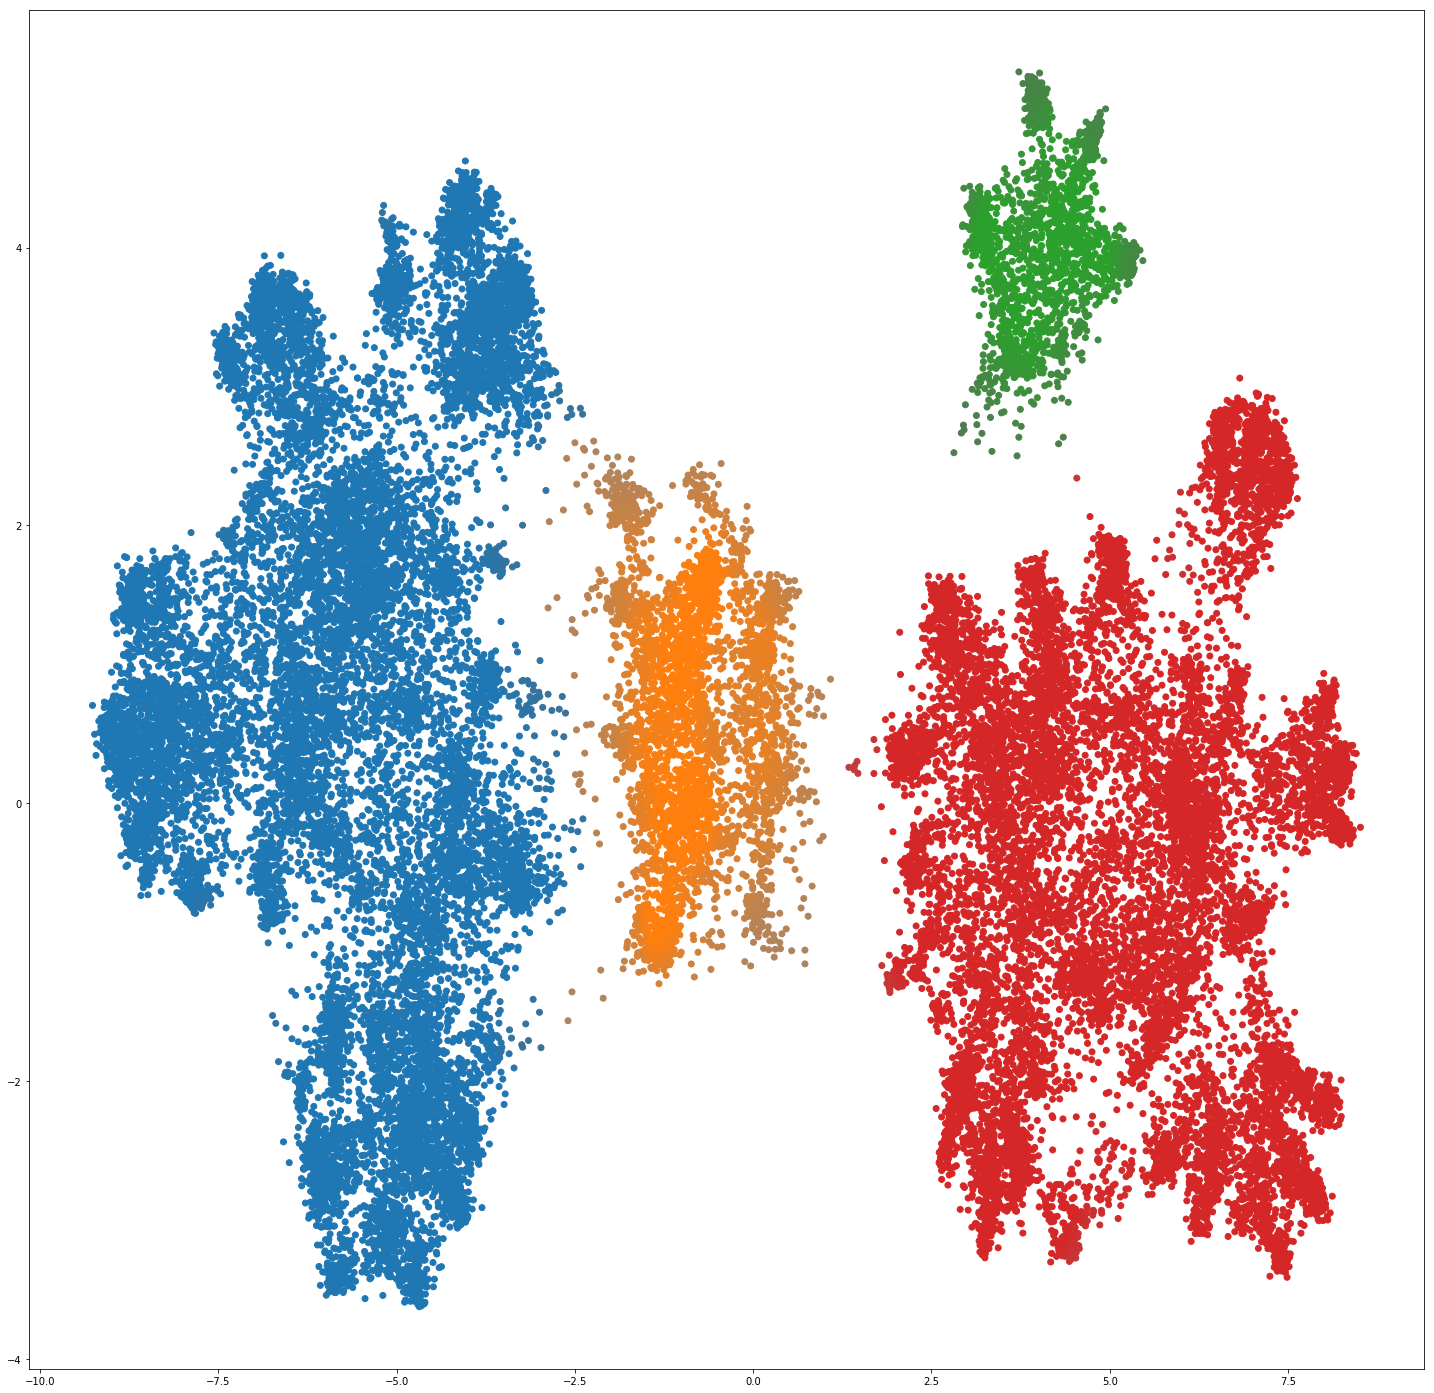

In [250]:
fig,axis = plt.subplots(figsize=(25,25))
plt.scatter(data_reduced.T[0], data_reduced.T[1], c=cluster_colors)

We can observe some evident seperation between clusters

In [251]:
all_dataframe["cluster_label"] = clust.labels_
#all_dataframe["cluster_probs"] = clust.probabilities_

In [228]:
#all_dataframe.drop(["cluster_probs"],axis=1,inplace=True)

In [252]:
train,test = all_dataframe[:len(train)],all_dataframe[len(train):]

In [253]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8,random_state=42,shuffle=True)
X_train_new,Y_train_new = train.drop(["0"],axis=1),train["0"]
myIterator=skf.split(X_train_new,Y_train_new)

In [254]:
scores_with_clusters = cross_val_score(lgbmClas,X_train_new,Y_train_new,cv=8,n_jobs=8,scoring="roc_auc",verbose=4,) 

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ......................... , score=0.74089427107592, total= 1.3min
[CV] ....................... , score=0.7383189134004224, total= 1.3min


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.3min remaining:  3.8min


[CV] ....................... , score=0.7377176515974839, total= 1.3min
[CV] ....................... , score=0.7415325867401589, total= 1.3min
[CV] ....................... , score=0.7645382563407715, total= 1.3min


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  1.3min remaining:   47.2s


[CV] ....................... , score=0.7461409624893557, total= 1.3min
[CV] ....................... , score=0.7476087746346569, total= 1.3min
[CV] ....................... , score=0.7476658066717631, total= 1.3min


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.3min finished


In [178]:
scores_with_clusters.mean()

0.7461910893180089

In [324]:
train.groupby(["cluster_label"]).mean()

,0,1,2,3,4,5,6,7,8,10,...,332,336,337,338,339,340,342,343,344,345
cluster_label,,,,,,,,,,,,,,,,,,,,,
-1,0.106383,0.989362,0.010638,0.000000,0.606383,0.000000,0.000000,0.095261,0.680851,0.914894,...,0.223404,0.220537,0.021277,0.787234,0.106383,0.000000,0.925532,0.925532,0.872340,0.755319
0,0.165740,0.970523,0.029477,0.000000,0.087319,0.000000,0.000000,0.094423,0.002225,0.988320,...,1.000000,0.109160,0.980534,0.006674,0.001112,0.000000,0.986096,0.996663,0.967186,0.646274
1,0.201794,0.976457,0.023543,0.000000,0.063901,0.001121,0.000000,0.095495,0.000000,0.931614,...,1.000000,0.450138,0.917040,0.014574,0.000000,0.000000,0.965247,0.988789,0.948430,0.782511
2,0.107308,0.980902,0.019003,0.000095,0.033563,0.000095,0.000095,0.096741,0.000473,0.897986,...,0.999149,0.449635,0.889288,0.008036,0.000662,0.000000,0.954051,0.986386,0.948757,0.639406
3,0.247407,0.975484,0.024226,0.000290,0.905636,0.000943,0.001378,0.096501,0.001813,0.983535,...,0.178429,0.227527,0.000218,0.871110,0.109669,0.002539,0.973236,0.985058,0.958512,0.619061
4,0.116050,0.982399,0.017601,0.000000,0.070704,0.001193,0.000597,0.096523,0.001193,0.897375,...,0.440931,0.246583,0.877983,0.016408,0.002088,0.000895,0.963902,0.979714,0.946897,0.558174


In [346]:
lgbmClas.fit(X_train_new,Y_train_new)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        learning_rate=0.02, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=800,
        n_jobs=-1, num_leaves=21, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.7,
        subsample_for_bin=200000, subsample_freq=1)

In [433]:
X_test = test.drop(["0"],axis=1)

In [349]:
vals= lgbmClas.predict_proba(X_test)

In [ ]:
submit(vals,"_lgbm_clusters_tuned")

## Feature Selection

In [403]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(
    SelectFromModel(estimator=cls), ##cls is a fine-tuned random forest
    lgbmClas
)

In [404]:
scores_with_rf = cross_val_score(pipe,X_train_new,Y_train_new,cv=8,n_jobs=8,scoring="roc_auc",verbose=4,) 

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.7432786175683241, total= 1.2min
[CV] ....................... , score=0.7548239733148908, total= 1.3min


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.3min remaining:  3.9min


[CV] ........................ , score=0.734609250398724, total= 1.3min
[CV] ....................... , score=0.7419713647148207, total= 1.3min
[CV] ....................... , score=0.7315596580617539, total= 1.3min


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  1.3min remaining:   47.6s


[CV] ....................... , score=0.7418907293307958, total= 1.3min
[CV] ....................... , score=0.7335473975902481, total= 1.3min
[CV] ....................... , score=0.7338078134383007, total= 1.3min


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.3min finished


In [406]:
scores_with_rf.mean()

0.7394361005522323

In [487]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [488]:
pipeXGB = make_pipeline(
    SelectFromModel(estimator=xgb), ##cls is a fine-tuned random forest
    lgbmClas
)

In [523]:
scores_with_xgb = cross_val_score(lgbmClas,X_selected,Y_train_new,cv=8,n_jobs=8,scoring="roc_auc",verbose=4,)

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.7445917018343661, total=  56.1s
[CV] ....................... , score=0.7347419231909218, total= 1.2min


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.2min remaining:  3.5min


[CV] ....................... , score=0.7479976132549189, total= 1.2min
[CV] ....................... , score=0.7652891278881031, total= 1.2min
[CV] ....................... , score=0.7347772085079955, total= 1.2min


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  1.2min remaining:   44.2s


[CV] ....................... , score=0.7478130241541529, total= 1.2min
[CV] ....................... , score=0.7380419906892338, total= 1.2min
[CV] ....................... , score=0.7366054584033158, total= 1.2min


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.2min finished


In [492]:
scores_with_xgb.mean()

0.7462306970153841

In [453]:
scores_feature_lb = 0.76278501

In [454]:
scores_feature_lb-scores_with_xgb.mean()

0.01655431298461585

In [438]:
lgbmClas.fit(X_selected,Y_train_new)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        learning_rate=0.02, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=800,
        n_jobs=-1, num_leaves=21, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.7,
        subsample_for_bin=200000, subsample_freq=1)

In [445]:
X_test_selected = selector.transform(X_test)

In [446]:
vals=lgbmClas.predict_proba(X_test_selected)

In [447]:
submit(vals,"_feature_selection_xgb_lgb")

/home/ukma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,_ID_,_VAL_
0,0,0.154791
1,1,0.573411
2,2,0.215665
3,3,0.339370
4,4,0.681132
5,5,0.351316
6,6,0.081845
7,7,0.115840
8,8,0.133815
9,9,0.320521


In [620]:
!ls

CMakeCache.txt
CMakeFiles
Makefile
XgbFeatureInteractions.xlsx
catboost
catboost_training.json
cmake_install.cmake
dmlc-core
hw5-mutibank-classification.ipynb
learn
learn_error.tsv
libgpuxgboost.a
librabit.a
meta.tsv
modulbank
report_all.html
submission_cboost_2_.csv
submission_cboost_new_without_rejected.csv
submission_cboost_pool2_.csv
submission_cboost_pool_.csv
submission_cboost_simple_without_rejected.csv
submission_feature_selection_xgb_lgb.csv
submission_lgbm_clusters_tuned.csv
submission_lgbm_tuned.csv
submission_lightGBM_1.csv
submission_new_features2_selected_lgbm_xgb_.csv
submission_new_features_lgbm_.csv
submission_new_features_selected_lgbm_xgb_.csv
submission_target_encoding_.csv
submissioncboost_simple.csv
time_left.tsv


In [621]:
!git add submission_new_features2_selected_lgbm_xgb_.csv
!git commit -m " added  selected new features  importances"
!git push

[master 6ea37e6]  added  selected new features  importances
 Committer: UKMA <ukma@localhost.localdomain>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly:

    git config --global user.name "Your Name"
    git config --global user.email you@example.com

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 4167 insertions(+)
 create mode 100644 submission_new_features2_selected_lgbm_xgb_.csv
Git 2.0 from 'matching' to 'simple'. To squelch this message
and maintain the current behavior after the default changes, use:

  git config --global push.default matching

To squelch this message and adopt the new behavior now, use:

  git config --global push.default simple

See 'git help config' and search for 'push.default' for further information.
(the 'simple' mode was introduced in

# Cat features

In [28]:
array = np.array(all_dataframe.columns)
cat_cols = [column for column in all_dataframe.columns[1:] if len(all_dataframe[column].value_counts())==2]
cat_cols_int =  [np.where(array == cat)[0][0] for cat in cat_cols]

In [31]:
test.shape

(4166, 344)

In [497]:
cat_cols

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '8',
 '10',
 '11',
 '12',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '95',
 '96',
 '97',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '141',
 '142',
 '143',
 '144',
 '145',
 '147',
 '149',
 '150',
 '151',
 '152',
 '154',
 '155',
 '156',
 '157',
 '159',
 '160',
 '161',
 '162',
 '163',
 '166',
 '167',
 '168',
 '169',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '190',
 '191',
 '192',
 '193',
 '215',
 '216',
 '217',
 '218',
 '219',
 '220',
 '221',
 '222',
 '223',
 '224',
 '225',
 '226',


In [500]:
from category_encoders.target_encoder import TargetEncoder

In [516]:
encoder = TargetEncoder(cols=cat_cols+["cluster_label"])

In [517]:
encoder.fit(X_train_new,Y_train_new)

TargetEncoder(cols=['1', '2', '3', '4', '5', '6', '8', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '...'310', '316', '318', '332', '337', '338', '339', '340', '342', '343', '344', '345', 'cluster_label'],
       drop_invariant=False, handle_unknown='impute', impute_missing=True,
       min_samples_leaf=1, return_df=True, smoothing=1, verbose=0)

In [518]:
X_train_te = encoder.transform(X_train_new)

In [520]:
scores_with_targenc = cross_val_score(lgbmClas,X_train_te,Y_train_new,cv=8,n_jobs=8,scoring="roc_auc",verbose=4,)

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ........................ , score=0.738662827624169, total= 1.8min
[CV] ........................ , score=0.737087691069992, total= 1.9min


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.9min remaining:  5.8min


[CV] ....................... , score=0.7459035555149176, total= 1.9min
[CV] ....................... , score=0.7427105511348555, total= 2.0min
[CV] ....................... , score=0.7662597093430814, total= 2.0min


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  2.0min remaining:  1.2min


[CV] ....................... , score=0.7455702812945477, total= 2.0min
[CV] ....................... , score=0.7338367371902538, total= 2.0min
[CV] ....................... , score=0.7486846142696055, total= 2.0min


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.1min finished


In [521]:
scores_with_targenc.mean()

0.7448394959301778

In [531]:
target_lb= 0.75855934

In [532]:
target_lb - scores_with_targenc.mean()

0.013719844069822185

In [525]:
lgbmClas.fit(X_train_te,Y_train_new)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        learning_rate=0.02, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=800,
        n_jobs=-1, num_leaves=21, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.7,
        subsample_for_bin=200000, subsample_freq=1)

In [526]:
X_test_te = encoder.transform(X_test)

In [527]:
vals = lgbmClas.predict_proba(X_test_te)

In [528]:
submit(vals,"_target_encoding_")

/home/ukma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,_ID_,_VAL_
0,0,0.118911
1,1,0.497434
2,2,0.245586
3,3,0.338335
4,4,0.642404
5,5,0.357156
6,6,0.081461
7,7,0.110153
8,8,0.099911
9,9,0.364866


## XGFir

In [534]:
import xgbfir

In [536]:
xgb_clas.fit(X_train_new,Y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.9, gamma=0, grow_policy='lossguide',
       learning_rate=0.065, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.85, tree_method='hist')

In [537]:
xgbfir.saveXgbFI(xgb_clas,feature_names=X_train_new.columns)

In [32]:
expeted_features='''
338|339
144|338
329|338
338|91
339|cluster_label
116|86
338|86
121|22
329|4
295|338
116|36
115|201
338|4
116|144
214|338
328|338
337|86
233|338
144|233
114|121
214|317
116|338
201|22
338|34
320|344
328|4
201|338
198|295
46|cluster_label
72|86
36|91
295|86
337|cluster_label
338|98
4|86
338|36
321|329
219|74
125|147
116|295
'''

In [33]:
expeted_features = expeted_features.split()

In [34]:
expeted_features = [sample.split("|") for sample in expeted_features]

In [605]:
all_dataframe = all_dataframe.loc[:,"0":"cluster_label"]

In [607]:
#all_dataframe

In [608]:
for index,pair in enumerate(expeted_features):
    all_dataframe["addition_"+str(index)] = all_dataframe[pair[0]] + all_dataframe[pair[1]]
    all_dataframe["diff_"+str(index)] = np.abs(all_dataframe[pair[0]] - all_dataframe[pair[1]])
    all_dataframe["mult_"+str(index)] = all_dataframe[pair[0]] * all_dataframe[pair[1]]
    #all_dataframe["div_"+str(index)] = all_dataframe[pair[0]] / all_dataframe[pair[1]]
    all_dataframe["arithm_mean_"+str(index)] = (all_dataframe[pair[0]] + all_dataframe[pair[1]])/2
    all_dataframe["harmonic_mean_"+str(index)] = np.sqrt(all_dataframe[pair[0]] * all_dataframe[pair[1]])
   # all_dataframe["module"+str(index)] = all_dataframe[pair[0]] % all_dataframe[pair[1]]
    all_dataframe["euclid_distance_"+str(index)] = np.sqrt(np.abs(all_dataframe[pair[0]]**2 - all_dataframe[pair[1]]**2))
   # all_dataframe["exponent_"+str(index)] = (all_dataframe[pair[0]] ** np.abs(all_dataframe[pair[1]]))
   # all_dataframe["exponent_symmetry"+str(index)] = (all_dataframe[pair[1]] ** np.abs(all_dataframe[pair[0]]))

/home/ukma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [609]:
all_dataframe.replace([np.inf, -np.inf,np.nan], 0,inplace=True)

In [610]:
train,test = all_dataframe[:len(train)],all_dataframe[len(train):]

In [611]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8,random_state=42,shuffle=True)
X_train_new,Y_train_new = train.drop(["0"],axis=1),train["0"]
myIterator=skf.split(X_train_new,Y_train_new)

In [612]:
selector = SelectFromModel(xgb_clas)
X_selected = selector.fit_transform(X_train_new, Y_train_new)

In [613]:
scores_with_new_features = cross_val_score(lgbmClas,X_selected,Y_train_new,cv=8,n_jobs=8,scoring="roc_auc",verbose=4,)

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.7648699383212657, total= 1.1min
[CV] ....................... , score=0.7430602225472644, total= 1.2min


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.2min remaining:  3.7min


[CV] ....................... , score=0.7379444185685452, total= 1.3min
[CV] ....................... , score=0.7387197546023816, total= 1.4min
[CV] ....................... , score=0.7488758097980268, total= 1.4min


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  1.4min remaining:   51.7s


[CV] ....................... , score=0.7512949411750289, total= 1.4min
[CV] ....................... , score=0.7396489346186598, total= 1.5min
[CV] ....................... , score=0.7489302784382159, total= 1.5min


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.5min finished


In [588]:
scores_with_new_features.mean()

0.747630332902754

In [615]:
lgbmClas.fit(X_selected,Y_train_new)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        learning_rate=0.02, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=800,
        n_jobs=-1, num_leaves=21, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.7,
        subsample_for_bin=200000, subsample_freq=1)

In [616]:
X_test = selector.transform(test.drop(["0"],axis=1))

In [617]:
values=lgbmClas.predict_proba(X_test)

In [618]:
submit(values,"_new_features2_selected_lgbm_xgb_")

/home/ukma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,_ID_,_VAL_
0,0,0.137991
1,1,0.597930
2,2,0.260742
3,3,0.311502
4,4,0.645322
5,5,0.326685
6,6,0.067808
7,7,0.125024
8,8,0.076299
9,9,0.358605
